In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Milestone 1
Preprocessing data

In [2]:
df= pd.read_excel('capstone.xlsx', sheet_name=None)

In [3]:
df.keys()

dict_keys(['DimChannel', 'DimCustomer', 'DimEmployee', 'DimGeography', 'DimProduct', 'DimProductCategory', 'DimProductSubcategory', 'DimPromotion', 'DimSales', 'DimSalesPerson', 'DimStore', 'FactInventory', 'FactSales'])

In [4]:
sales= pd.read_excel('capstone.xlsx', sheet_name="FactSales")

In [5]:
sales.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate
0,1,2007-01-02,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,2,2007-02-12,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
3,4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01
4,5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SalesKey          100000 non-null  int64         
 1   DateKey           100000 non-null  datetime64[ns]
 2   channelKey        100000 non-null  int64         
 3   StoreKey          100000 non-null  int64         
 4   ProductKey        100000 non-null  int64         
 5   PromotionKey      100000 non-null  int64         
 6   CurrencyKey       100000 non-null  int64         
 7   UnitCost          100000 non-null  float64       
 8   UnitPrice         100000 non-null  float64       
 9   SalesQuantity     100000 non-null  int64         
 10  ReturnQuantity    100000 non-null  int64         
 11  ReturnAmount      100000 non-null  float64       
 12  DiscountQuantity  100000 non-null  int64         
 13  DiscountAmount    100000 non-null  float64       
 14  Total

In [7]:
sales.columns

Index(['SalesKey', 'DateKey', 'channelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'CurrencyKey', 'UnitCost', 'UnitPrice', 'SalesQuantity',
       'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

In [8]:
sales.drop(columns=["ETLLoadID", "LoadDate", "UpdateDate"], inplace=True)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SalesKey          100000 non-null  int64         
 1   DateKey           100000 non-null  datetime64[ns]
 2   channelKey        100000 non-null  int64         
 3   StoreKey          100000 non-null  int64         
 4   ProductKey        100000 non-null  int64         
 5   PromotionKey      100000 non-null  int64         
 6   CurrencyKey       100000 non-null  int64         
 7   UnitCost          100000 non-null  float64       
 8   UnitPrice         100000 non-null  float64       
 9   SalesQuantity     100000 non-null  int64         
 10  ReturnQuantity    100000 non-null  int64         
 11  ReturnAmount      100000 non-null  float64       
 12  DiscountQuantity  100000 non-null  int64         
 13  DiscountAmount    100000 non-null  float64       
 14  Total

In [10]:
channel= pd.read_excel('capstone.xlsx', sheet_name="DimChannel")

In [11]:
channel.head()

,ChannelKey,ChannelLabel,ChannelName,ChannelDescription,ETLLoadID,LoadDate,UpdateDate
0,1,1,Store,Store,1,2009-07-11 14:43:19,2009-07-11 14:43:19
1,2,2,Online,Online,1,2009-07-11 14:43:19,2009-07-11 14:43:19
2,3,3,Catalog,Catalog,1,2009-07-11 14:43:19,2009-07-11 14:43:19
3,4,4,Reseller,Reseller,1,2009-07-11 14:43:19,2009-07-11 14:43:19


In [12]:
channel.drop(columns=["ChannelLabel","ChannelDescription","ETLLoadID", "LoadDate", "UpdateDate"], inplace=True)

In [13]:
channel.head()

,ChannelKey,ChannelName
0,1,Store
1,2,Online
2,3,Catalog
3,4,Reseller


In [14]:
channel.rename(columns={"ChannelKey": "channelKey"},inplace=True)

In [15]:
channel.head()

,channelKey,ChannelName
0,1,Store
1,2,Online
2,3,Catalog
3,4,Reseller


In [16]:
store= pd.read_excel('capstone.xlsx', sheet_name="DimStore")

In [17]:
store.shape

(306, 25)

In [18]:
store.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,StoreDescription,Status,OpenDate,CloseDate,EntityKey,...,AddressLine2,CloseReason,EmployeeCount,SellingAreaSize,LastRemodelDate,GeoLocation,Geometry,ETLLoadID,LoadDate,UpdateDate
0,15,678,48,Store,Contoso Renton Store,Contoso Renton Store,On,2004-02-24,NaT,649,...,"Renton,Citycenter",NaN,22.0,500,2009-06-17,POINT (-122.189 47.4894),POINT (-122.189 47.4894),1,2009-07-10,2009-06-17
1,17,551,135,Store,Contoso Spokane Store,Contoso Spokane Store,On,2004-03-26,NaT,651,...,Logan Ave Shopping mall,NaN,25.0,700,2009-06-17,POINT (-117.414 47.6566),POINT (-117.414 47.6566),1,2009-07-10,2009-06-17
2,20,824,52,Store,Contoso Englewood Store,Contoso Englewood Store,On,2004-09-29,NaT,654,...,Cherry Hills Village Shopping mall,NaN,33.0,560,2009-06-17,POINT (-104.961 39.6541),POINT (-104.961 39.6541),1,2009-07-10,2009-06-17
3,22,571,54,Store,Contoso Westminster Store,Contoso Westminster Store,On,2004-12-03,NaT,656,...,South Central Shopping mall,NaN,22.0,500,2009-06-17,POINT (-0.159302 51.5105),POINT (-0.159302 51.5105),1,2009-07-10,2009-06-17
4,25,839,57,Store,Contoso Greeley No.1 Store,Contoso Greeley No.1 Store,On,2004-03-16,NaT,659,...,"W 29th Street, Greeley CityCenter",NaN,25.0,700,2009-06-17,POINT (-104.696 40.4083),POINT (-104.696 40.4083),1,2009-07-10,2009-06-17


In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StoreKey          306 non-null    int64         
 1   GeographyKey      306 non-null    int64         
 2   StoreManager      306 non-null    int64         
 3   StoreType         306 non-null    object        
 4   StoreName         306 non-null    object        
 5   StoreDescription  306 non-null    object        
 6   Status            306 non-null    object        
 7   OpenDate          306 non-null    datetime64[ns]
 8   CloseDate         12 non-null     datetime64[ns]
 9   EntityKey         306 non-null    int64         
 10  ZipCode           265 non-null    float64       
 11  ZipCodeExtension  265 non-null    float64       
 12  StorePhone        306 non-null    object        
 13  StoreFax          306 non-null    object        
 14  AddressLine1      299 non-

In [20]:
store.drop(columns=["EntityKey", "AddressLine2","LastRemodelDate","CloseReason","CloseDate",
                    "ETLLoadID", "LoadDate", "UpdateDate","StoreDescription"], inplace=True)

In [21]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   StoreKey          306 non-null    int64         
 1   GeographyKey      306 non-null    int64         
 2   StoreManager      306 non-null    int64         
 3   StoreType         306 non-null    object        
 4   StoreName         306 non-null    object        
 5   Status            306 non-null    object        
 6   OpenDate          306 non-null    datetime64[ns]
 7   ZipCode           265 non-null    float64       
 8   ZipCodeExtension  265 non-null    float64       
 9   StorePhone        306 non-null    object        
 10  StoreFax          306 non-null    object        
 11  AddressLine1      299 non-null    object        
 12  EmployeeCount     305 non-null    float64       
 13  SellingAreaSize   306 non-null    int64         
 14  GeoLocation       306 non-

In [22]:
product= pd.read_excel('capstone.xlsx', sheet_name="DimProduct")

In [23]:
product.head()

,ProductKey,ProductLabel,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassID,ClassName,StyleID,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,416,303001,Adventure Works Desktop PC2.33 XD233 Silver,"2.33GHz dual processor, 4MB L2 cache, 750GB 72...",17,Adventure Works,Adventure Works,3,Deluxe,1.0,...,321.05,969.00,2008-12-09,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
1,417,303002,Adventure Works Desktop PC2.30 MD230 Silver,"2.3GHz dual processor, 4 GB DDR2 SDRAM memorie...",17,Adventure Works,Adventure Works,2,Regular,1.0,...,275.46,599.00,2008-01-08,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
2,418,303003,Adventure Works Desktop PC1.60 ED160 Silver,"1.60GHz dual processor, 1GB DDR2 memory, 30GB ...",17,Adventure Works,Adventure Works,1,Economy,1.0,...,137.63,269.95,2005-05-06,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
3,423,303008,Adventure Works Desktop PC2.30 MD230 Black,"2.3GHz dual processor, 4 GB DDR2 SDRAM memorie...",17,Adventure Works,Adventure Works,2,Regular,1.0,...,275.46,599.00,2008-01-08,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31
4,429,303014,Adventure Works Desktop PC2.30 MD230 Brown,"2.3GHz dual processor, 4 GB DDR2 SDRAM memorie...",17,Adventure Works,Adventure Works,2,Regular,1.0,...,275.87,599.90,2008-01-08,NaN,On,NaN,NaN,1,2009-03-31,2009-03-31


In [24]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             2517 non-null   int64         
 1   ProductLabel           2517 non-null   int64         
 2   ProductName            2517 non-null   object        
 3   ProductDescription     2516 non-null   object        
 4   ProductSubcategoryKey  2517 non-null   int64         
 5   Manufacturer           2517 non-null   object        
 6   BrandName              2517 non-null   object        
 7   ClassID                2517 non-null   int64         
 8   ClassName              2517 non-null   object        
 9   StyleID                2487 non-null   float64       
 10  StyleName              2517 non-null   object        
 11  ColorID                2517 non-null   int64         
 12  ColorName              2517 non-null   object        
 13  Siz

In [25]:
product.drop(columns=["ProductLabel", "SizeUnitMeasureID","SizeRange","StopSaleDate","ImageURL", "BrandName",
                    "ETLLoadID", "LoadDate", "UpdateDate","ProductURL","ProductDescription",
                     "StyleName","StockTypeID","Weight","Size"], inplace=True)

In [26]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             2517 non-null   int64         
 1   ProductName            2517 non-null   object        
 2   ProductSubcategoryKey  2517 non-null   int64         
 3   Manufacturer           2517 non-null   object        
 4   ClassID                2517 non-null   int64         
 5   ClassName              2517 non-null   object        
 6   StyleID                2487 non-null   float64       
 7   ColorID                2517 non-null   int64         
 8   ColorName              2517 non-null   object        
 9   WeightUnitMeasureID    2295 non-null   object        
 10  UnitOfMeasureID        2517 non-null   int64         
 11  UnitOfMeasureName      2517 non-null   object        
 12  StockTypeName          2517 non-null   object        
 13  Uni

In [27]:
promotion= pd.read_excel('capstone.xlsx', sheet_name="DimPromotion")

In [28]:
promotion.head()

,PromotionKey,PromotionLabel,PromotionName,PromotionDescription,DiscountPercent,PromotionType,PromotionCategory,StartDate,EndDate,MinQuantity,MaxQuantity,ETLLoadID,LoadDate,UpdateDate
0,1,1,No Discount,No Discount,0.00,No Discount,No Discount,2003-01-01,2010-12-31,NaN,NaN,1,2009-09-01,2009-09-01
1,2,2,North America Spring Promotion,North America Spring Promotion,0.05,Seasonal Discount,Store,2007-01-01,2007-03-31,NaN,NaN,1,2009-09-01,2009-09-01
2,3,3,North America Back-to-School Promotion,North America Back-to-School Promotion,0.10,Seasonal Discount,Store,2007-07-01,2007-09-30,NaN,NaN,1,2009-09-01,2009-09-01
3,4,4,North America Holiday Promotion,North America Holiday Promotion,0.20,Seasonal Discount,Store,2007-11-01,2007-12-31,NaN,NaN,1,2009-09-01,2009-09-01
4,5,5,Asian Holiday Promotion,Asian Holiday Promotion,0.15,Seasonal Discount,Store,2007-11-01,2008-01-31,NaN,NaN,1,2009-09-01,2009-09-01


In [29]:
promotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   PromotionKey          28 non-null     int64         
 1   PromotionLabel        28 non-null     int64         
 2   PromotionName         28 non-null     object        
 3   PromotionDescription  28 non-null     object        
 4   DiscountPercent       28 non-null     float64       
 5   PromotionType         28 non-null     object        
 6   PromotionCategory     28 non-null     object        
 7   StartDate             28 non-null     datetime64[ns]
 8   EndDate               28 non-null     datetime64[ns]
 9   MinQuantity           0 non-null      float64       
 10  MaxQuantity           0 non-null      float64       
 11  ETLLoadID             28 non-null     int64         
 12  LoadDate              28 non-null     datetime64[ns]
 13  UpdateDate            

In [30]:
promotion.drop(columns=["PromotionLabel", "PromotionDescription","MinQuantity","MaxQuantity",
                    "ETLLoadID", "LoadDate", "UpdateDate"], inplace=True)

In [31]:
promotion.head()

,PromotionKey,PromotionName,DiscountPercent,PromotionType,PromotionCategory,StartDate,EndDate
0,1,No Discount,0.00,No Discount,No Discount,2003-01-01,2010-12-31
1,2,North America Spring Promotion,0.05,Seasonal Discount,Store,2007-01-01,2007-03-31
2,3,North America Back-to-School Promotion,0.10,Seasonal Discount,Store,2007-07-01,2007-09-30
3,4,North America Holiday Promotion,0.20,Seasonal Discount,Store,2007-11-01,2007-12-31
4,5,Asian Holiday Promotion,0.15,Seasonal Discount,Store,2007-11-01,2008-01-31


In [32]:
customer= pd.read_excel('capstone.xlsx', sheet_name="DimCustomer")

In [33]:
customer.head()

,CustomerKey,GeographyKey,CustomerLabel,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CustomerType,CompanyName,ETLLoadID,LoadDate,UpdateDate,Rating
0,1,680,11000,NaN,Jon,V,Yang,0,1966-04-08,M,...,3761 N. 14th St,NaN,1 (11) 500 555-0162,2001-07-22,Person,NaN,1,2009-10-01,2009-10-01,1
1,2,692,11001,NaN,Eugene,L,Huang,0,1965-05-14,S,...,2243 W St.,NaN,1 (11) 500 555-0110,2001-07-18,Person,NaN,1,2009-10-01,2009-10-01,1
2,3,493,11002,NaN,Ruben,NaN,Torres,0,1965-08-12,M,...,5844 Linden Land,NaN,1 (11) 500 555-0184,2001-07-10,Person,NaN,1,2009-10-01,2009-10-01,4
3,4,519,11003,NaN,Christy,NaN,Zhu,0,1968-02-15,S,...,1825 Village Pl.,NaN,1 (11) 500 555-0162,2001-07-01,Person,NaN,1,2009-10-01,2009-10-01,3
4,5,706,11004,NaN,Elizabeth,NaN,Johnson,0,1968-08-08,S,...,7553 Harness Circle,NaN,1 (11) 500 555-0131,2001-07-26,Person,NaN,1,2009-10-01,2009-10-01,5


In [34]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18869 non-null  int64         
 1   GeographyKey          18869 non-null  int64         
 2   CustomerLabel         18869 non-null  object        
 3   Title                 101 non-null    object        
 4   FirstName             18484 non-null  object        
 5   MiddleName            10654 non-null  object        
 6   LastName              18484 non-null  object        
 7   NameStyle             18869 non-null  int64         
 8   BirthDate             18484 non-null  datetime64[ns]
 9   MaritalStatus         18484 non-null  object        
 10  Suffix                3 non-null      object        
 11  Gender                18484 non-null  object        
 12  EmailAddress          18484 non-null  object        
 13  YearlyIncome    

In [35]:
customer.drop(columns=["Suffix", "AddressLine2","Title", "CustomerLabel","NameStyle",
                    "ETLLoadID", "LoadDate", "UpdateDate"], inplace=True)

In [36]:
customer.head()

,CustomerKey,GeographyKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,Phone,DateFirstPurchase,CustomerType,CompanyName,Rating
0,1,680,Jon,V,Yang,1966-04-08,M,M,jon24@adventure-works.com,90000,...,Bachelors,Professional,1.0,0.0,3761 N. 14th St,1 (11) 500 555-0162,2001-07-22,Person,NaN,1
1,2,692,Eugene,L,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000,...,Bachelors,Professional,0.0,1.0,2243 W St.,1 (11) 500 555-0110,2001-07-18,Person,NaN,1
2,3,493,Ruben,NaN,Torres,1965-08-12,M,M,ruben35@adventure-works.com,60000,...,Bachelors,Professional,1.0,1.0,5844 Linden Land,1 (11) 500 555-0184,2001-07-10,Person,NaN,4
3,4,519,Christy,NaN,Zhu,1968-02-15,S,F,christy12@adventure-works.com,70000,...,Bachelors,Professional,0.0,1.0,1825 Village Pl.,1 (11) 500 555-0162,2001-07-01,Person,NaN,3
4,5,706,Elizabeth,NaN,Johnson,1968-08-08,S,F,elizabeth5@adventure-works.com,80000,...,Bachelors,Professional,1.0,4.0,7553 Harness Circle,1 (11) 500 555-0131,2001-07-26,Person,NaN,5


In [37]:
product_cat= pd.read_excel('capstone.xlsx', sheet_name="DimProductCategory")

In [38]:
product_cat.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID,LoadDate,UpdateDate
0,1,1,Audio,Audio,1,2009-07-07,2009-07-07
1,2,2,TV and Video,TV and Video,1,2009-07-07,2009-07-07
2,3,3,Computers,Computers,1,2009-07-07,2009-07-07
3,4,4,Cameras and camcorders,Cameras and camcorders,1,2009-07-07,2009-07-07
4,5,5,Cell phones,Cell phones,1,2009-07-07,2009-07-07


In [39]:
product_cat.drop(columns=["ProductCategoryLabel", "ProductCategoryDescription",
                    "ETLLoadID", "LoadDate", "UpdateDate"], inplace=True)

In [40]:
product_cat.head(8)

,ProductCategoryKey,ProductCategoryName
0,1,Audio
1,2,TV and Video
2,3,Computers
3,4,Cameras and camcorders
4,5,Cell phones
5,6,"Music, Movies and Audio Books"
6,7,Games and Toys
7,8,Home Appliances


In [41]:
product_subcat= pd.read_excel('capstone.xlsx', sheet_name="DimProductSubcategory")

In [42]:
product_subcat.head()

,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,ProductSubcategoryDescription,ProductCategoryKey,ETLLoadID,LoadDate,UpdateDate
0,1,101,MP4&MP3,MP4&MP3,1,1,2009-07-07,2009-07-07
1,2,102,Recorder,Recorder,1,1,2009-07-07,2009-07-07
2,3,103,Radio,Radio,1,1,2009-07-07,2009-07-07
3,4,104,Recording Pen,Recording Pen,1,1,2009-07-07,2009-07-07
4,5,105,Headphones,Headphones,1,1,2009-07-07,2009-07-07


In [43]:
product_subcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductSubcategoryKey          44 non-null     int64         
 1   ProductSubcategoryLabel        44 non-null     int64         
 2   ProductSubcategoryName         44 non-null     object        
 3   ProductSubcategoryDescription  44 non-null     object        
 4   ProductCategoryKey             44 non-null     int64         
 5   ETLLoadID                      44 non-null     int64         
 6   LoadDate                       44 non-null     datetime64[ns]
 7   UpdateDate                     44 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 2.9+ KB


In [44]:
product_subcat.drop(columns=["ProductSubcategoryLabel", "ProductSubcategoryDescription",
                    "ETLLoadID", "LoadDate", "UpdateDate"], inplace=True)

In [45]:
product_subcat.head()

,ProductSubcategoryKey,ProductSubcategoryName,ProductCategoryKey
0,1,MP4&MP3,1
1,2,Recorder,1
2,3,Radio,1
3,4,Recording Pen,1
4,5,Headphones,1


In [46]:
geo= pd.read_excel('capstone.xlsx', sheet_name="DimGeography")

In [47]:
geo.head()

,GeographyKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,Geometry,ETLLoadID,LoadDate,UpdateDate
0,782,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
1,783,City,North America,Alexandria,Virginia,United States,POINT (-79.1436 38.5309),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
2,784,City,North America,Anchorage,Alaska,United States,POINT (-149.628 61.1147),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
3,785,City,North America,Annapolis,Maryland,United States,POINT (-76.5427 38.9884),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760
4,786,City,North America,Appleton,Wisconsin,United States,POINT (-88.4981 44.2772),1,2009-09-28 20:19:34.760,2009-09-28 20:19:34.760


In [48]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GeographyKey       674 non-null    int64         
 1   GeographyType      674 non-null    object        
 2   ContinentName      674 non-null    object        
 3   CityName           517 non-null    object        
 4   StateProvinceName  637 non-null    object        
 5   RegionCountryName  671 non-null    object        
 6   Geometry           564 non-null    object        
 7   ETLLoadID          674 non-null    int64         
 8   LoadDate           674 non-null    datetime64[ns]
 9   UpdateDate         674 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 52.8+ KB


In [49]:
geo.ContinentName.unique()

array(['North America', 'Asia', 'Europe'], dtype=object)

In [50]:
geo.drop(columns=["ETLLoadID", "LoadDate", "UpdateDate"], inplace=True)

In [51]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GeographyKey       674 non-null    int64 
 1   GeographyType      674 non-null    object
 2   ContinentName      674 non-null    object
 3   CityName           517 non-null    object
 4   StateProvinceName  637 non-null    object
 5   RegionCountryName  671 non-null    object
 6   Geometry           564 non-null    object
dtypes: int64(1), object(6)
memory usage: 37.0+ KB


### Milestone 2
Feature engineering

In [52]:
sales.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,1,2007-01-02,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400
1,2,2007-02-12,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605
2,3,2008-01-24,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500
3,4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200
4,5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080


In [53]:
channel.head()

,channelKey,ChannelName
0,1,Store
1,2,Online
2,3,Catalog
3,4,Reseller


In [54]:
sales1= pd.merge(sales, channel, on="channelKey")

In [55]:
sales1.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ChannelName
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.0,1,39.600,728.40,1544.400,Store
1,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.0,3,61.500,1881.27,3628.500,Store
2,12,2007-04-29,1,119,543,1,1,116.75,229.00,10,0,0.0,0,0.000,1167.50,2290.000,Store
3,13,2007-07-25,1,171,739,3,1,78.19,236.00,12,0,0.0,0,0.000,938.28,2832.000,Store
4,14,2008-12-16,1,16,1269,13,1,25.47,49.96,13,0,0.0,1,9.992,331.11,639.488,Store


In [56]:
store.head()

,StoreKey,GeographyKey,StoreManager,StoreType,StoreName,Status,OpenDate,ZipCode,ZipCodeExtension,StorePhone,StoreFax,AddressLine1,EmployeeCount,SellingAreaSize,GeoLocation,Geometry
0,15,678,48,Store,Contoso Renton Store,On,2004-02-24,97001.0,97015.0,424-555-0189,424-555-0189,"Renton,Citycenter",22.0,500,POINT (-122.189 47.4894),POINT (-122.189 47.4894)
1,17,551,135,Store,Contoso Spokane Store,On,2004-03-26,97001.0,97017.0,984-555-0185,984-555-0185,Logan Ave Shopping mall,25.0,700,POINT (-117.414 47.6566),POINT (-117.414 47.6566)
2,20,824,52,Store,Contoso Englewood Store,On,2004-09-29,87001.0,87001.0,435-555-0113,435-555-0113,Cherry Hills Village Shopping mall,33.0,560,POINT (-104.961 39.6541),POINT (-104.961 39.6541)
3,22,571,54,Store,Contoso Westminster Store,On,2004-12-03,87001.0,87003.0,925-555-0114,925-555-0114,South Central Shopping mall,22.0,500,POINT (-0.159302 51.5105),POINT (-0.159302 51.5105)
4,25,839,57,Store,Contoso Greeley No.1 Store,On,2004-03-16,80631.0,80631.0,332-555-0150,332-555-0150,"W 29th Street, Greeley CityCenter",25.0,700,POINT (-104.696 40.4083),POINT (-104.696 40.4083)


In [57]:
sales2= pd.merge(sales1, store, on="StoreKey")

In [58]:
sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SalesKey          100000 non-null  int64         
 1   DateKey           100000 non-null  datetime64[ns]
 2   channelKey        100000 non-null  int64         
 3   StoreKey          100000 non-null  int64         
 4   ProductKey        100000 non-null  int64         
 5   PromotionKey      100000 non-null  int64         
 6   CurrencyKey       100000 non-null  int64         
 7   UnitCost          100000 non-null  float64       
 8   UnitPrice         100000 non-null  float64       
 9   SalesQuantity     100000 non-null  int64         
 10  ReturnQuantity    100000 non-null  int64         
 11  ReturnAmount      100000 non-null  float64       
 12  DiscountQuantity  100000 non-null  int64         
 13  DiscountAmount    100000 non-null  float64       
 14  Total

In [59]:
product.head()

,ProductKey,ProductName,ProductSubcategoryKey,Manufacturer,ClassID,ClassName,StyleID,ColorID,ColorName,WeightUnitMeasureID,UnitOfMeasureID,UnitOfMeasureName,StockTypeName,UnitCost,UnitPrice,AvailableForSaleDate,Status
0,416,Adventure Works Desktop PC2.33 XD233 Silver,17,Adventure Works,3,Deluxe,1.0,7,Silver,pounds,1,inches,High,321.05,969.00,2008-12-09,On
1,417,Adventure Works Desktop PC2.30 MD230 Silver,17,Adventure Works,2,Regular,1.0,7,Silver,pounds,1,inches,High,275.46,599.00,2008-01-08,On
2,418,Adventure Works Desktop PC1.60 ED160 Silver,17,Adventure Works,1,Economy,1.0,7,Silver,pounds,1,inches,High,137.63,269.95,2005-05-06,On
3,423,Adventure Works Desktop PC2.30 MD230 Black,17,Adventure Works,2,Regular,1.0,2,Black,pounds,1,inches,High,275.46,599.00,2008-01-08,On
4,429,Adventure Works Desktop PC2.30 MD230 Brown,17,Adventure Works,2,Regular,1.0,4,Brown,pounds,1,inches,High,275.87,599.90,2008-01-08,On


In [60]:
sales3= pd.merge(sales2, product, on="ProductKey")

In [61]:
sales3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SalesKey               100000 non-null  int64         
 1   DateKey                100000 non-null  datetime64[ns]
 2   channelKey             100000 non-null  int64         
 3   StoreKey               100000 non-null  int64         
 4   ProductKey             100000 non-null  int64         
 5   PromotionKey           100000 non-null  int64         
 6   CurrencyKey            100000 non-null  int64         
 7   UnitCost_x             100000 non-null  float64       
 8   UnitPrice_x            100000 non-null  float64       
 9   SalesQuantity          100000 non-null  int64         
 10  ReturnQuantity         100000 non-null  int64         
 11  ReturnAmount           100000 non-null  float64       
 12  DiscountQuantity       100000 non-null  int64

In [62]:
product_subcat.head()

,ProductSubcategoryKey,ProductSubcategoryName,ProductCategoryKey
0,1,MP4&MP3,1
1,2,Recorder,1
2,3,Radio,1
3,4,Recording Pen,1
4,5,Headphones,1


In [63]:
sales4= pd.merge(sales3, product_subcat, on="ProductSubcategoryKey")

In [64]:
sales4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SalesKey                100000 non-null  int64         
 1   DateKey                 100000 non-null  datetime64[ns]
 2   channelKey              100000 non-null  int64         
 3   StoreKey                100000 non-null  int64         
 4   ProductKey              100000 non-null  int64         
 5   PromotionKey            100000 non-null  int64         
 6   CurrencyKey             100000 non-null  int64         
 7   UnitCost_x              100000 non-null  float64       
 8   UnitPrice_x             100000 non-null  float64       
 9   SalesQuantity           100000 non-null  int64         
 10  ReturnQuantity          100000 non-null  int64         
 11  ReturnAmount            100000 non-null  float64       
 12  DiscountQuantity        100000 

In [65]:
product_cat.head()

,ProductCategoryKey,ProductCategoryName
0,1,Audio
1,2,TV and Video
2,3,Computers
3,4,Cameras and camcorders
4,5,Cell phones


In [66]:
sales5= pd.merge(sales4, product_cat, on="ProductCategoryKey")

In [67]:
sales5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SalesKey                100000 non-null  int64         
 1   DateKey                 100000 non-null  datetime64[ns]
 2   channelKey              100000 non-null  int64         
 3   StoreKey                100000 non-null  int64         
 4   ProductKey              100000 non-null  int64         
 5   PromotionKey            100000 non-null  int64         
 6   CurrencyKey             100000 non-null  int64         
 7   UnitCost_x              100000 non-null  float64       
 8   UnitPrice_x             100000 non-null  float64       
 9   SalesQuantity           100000 non-null  int64         
 10  ReturnQuantity          100000 non-null  int64         
 11  ReturnAmount            100000 non-null  float64       
 12  DiscountQuantity        100000 

In [68]:
promotion.head()

,PromotionKey,PromotionName,DiscountPercent,PromotionType,PromotionCategory,StartDate,EndDate
0,1,No Discount,0.00,No Discount,No Discount,2003-01-01,2010-12-31
1,2,North America Spring Promotion,0.05,Seasonal Discount,Store,2007-01-01,2007-03-31
2,3,North America Back-to-School Promotion,0.10,Seasonal Discount,Store,2007-07-01,2007-09-30
3,4,North America Holiday Promotion,0.20,Seasonal Discount,Store,2007-11-01,2007-12-31
4,5,Asian Holiday Promotion,0.15,Seasonal Discount,Store,2007-11-01,2008-01-31


In [69]:
sales6= pd.merge(sales5, promotion, on="PromotionKey")

In [70]:
sales6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 57 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SalesKey                100000 non-null  int64         
 1   DateKey                 100000 non-null  datetime64[ns]
 2   channelKey              100000 non-null  int64         
 3   StoreKey                100000 non-null  int64         
 4   ProductKey              100000 non-null  int64         
 5   PromotionKey            100000 non-null  int64         
 6   CurrencyKey             100000 non-null  int64         
 7   UnitCost_x              100000 non-null  float64       
 8   UnitPrice_x             100000 non-null  float64       
 9   SalesQuantity           100000 non-null  int64         
 10  ReturnQuantity          100000 non-null  int64         
 11  ReturnAmount            100000 non-null  float64       
 12  DiscountQuantity        100000 

In [71]:
geo.head()

,GeographyKey,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,Geometry
0,782,City,North America,Albany,New York,United States,POINT (-80.0326 40.9983)
1,783,City,North America,Alexandria,Virginia,United States,POINT (-79.1436 38.5309)
2,784,City,North America,Anchorage,Alaska,United States,POINT (-149.628 61.1147)
3,785,City,North America,Annapolis,Maryland,United States,POINT (-76.5427 38.9884)
4,786,City,North America,Appleton,Wisconsin,United States,POINT (-88.4981 44.2772)


In [72]:
sales7= pd.merge(sales6, geo, on="GeographyKey")

In [73]:
sales7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SalesKey                100000 non-null  int64         
 1   DateKey                 100000 non-null  datetime64[ns]
 2   channelKey              100000 non-null  int64         
 3   StoreKey                100000 non-null  int64         
 4   ProductKey              100000 non-null  int64         
 5   PromotionKey            100000 non-null  int64         
 6   CurrencyKey             100000 non-null  int64         
 7   UnitCost_x              100000 non-null  float64       
 8   UnitPrice_x             100000 non-null  float64       
 9   SalesQuantity           100000 non-null  int64         
 10  ReturnQuantity          100000 non-null  int64         
 11  ReturnAmount            100000 non-null  float64       
 12  DiscountQuantity        100000 

In [74]:
sales7.to_csv("capstone_sales.csv")

In [75]:
customer.head()

,CustomerKey,GeographyKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,Phone,DateFirstPurchase,CustomerType,CompanyName,Rating
0,1,680,Jon,V,Yang,1966-04-08,M,M,jon24@adventure-works.com,90000,...,Bachelors,Professional,1.0,0.0,3761 N. 14th St,1 (11) 500 555-0162,2001-07-22,Person,NaN,1
1,2,692,Eugene,L,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000,...,Bachelors,Professional,0.0,1.0,2243 W St.,1 (11) 500 555-0110,2001-07-18,Person,NaN,1
2,3,493,Ruben,NaN,Torres,1965-08-12,M,M,ruben35@adventure-works.com,60000,...,Bachelors,Professional,1.0,1.0,5844 Linden Land,1 (11) 500 555-0184,2001-07-10,Person,NaN,4
3,4,519,Christy,NaN,Zhu,1968-02-15,S,F,christy12@adventure-works.com,70000,...,Bachelors,Professional,0.0,1.0,1825 Village Pl.,1 (11) 500 555-0162,2001-07-01,Person,NaN,3
4,5,706,Elizabeth,NaN,Johnson,1968-08-08,S,F,elizabeth5@adventure-works.com,80000,...,Bachelors,Professional,1.0,4.0,7553 Harness Circle,1 (11) 500 555-0131,2001-07-26,Person,NaN,5


In [76]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18869 non-null  int64         
 1   GeographyKey          18869 non-null  int64         
 2   FirstName             18484 non-null  object        
 3   MiddleName            10654 non-null  object        
 4   LastName              18484 non-null  object        
 5   BirthDate             18484 non-null  datetime64[ns]
 6   MaritalStatus         18484 non-null  object        
 7   Gender                18484 non-null  object        
 8   EmailAddress          18484 non-null  object        
 9   YearlyIncome          18869 non-null  int64         
 10  TotalChildren         18484 non-null  float64       
 11  NumberChildrenAtHome  18484 non-null  float64       
 12  Education             18484 non-null  object        
 13  Occupation      

In [77]:
customer1= pd.merge(customer, geo, on="GeographyKey")

In [78]:
customer1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18869 non-null  int64         
 1   GeographyKey          18869 non-null  int64         
 2   FirstName             18484 non-null  object        
 3   MiddleName            10654 non-null  object        
 4   LastName              18484 non-null  object        
 5   BirthDate             18484 non-null  datetime64[ns]
 6   MaritalStatus         18484 non-null  object        
 7   Gender                18484 non-null  object        
 8   EmailAddress          18484 non-null  object        
 9   YearlyIncome          18869 non-null  int64         
 10  TotalChildren         18484 non-null  float64       
 11  NumberChildrenAtHome  18484 non-null  float64       
 12  Education             18484 non-null  object        
 13  Occupation      

In [79]:
customer1.to_csv("customer_final.csv")

### Transaction frequency

In [80]:
sales7.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost_x,UnitPrice_x,SalesQuantity,...,PromotionType,PromotionCategory,StartDate,EndDate,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,Geometry_y
0,1,2007-01-02,1,209,956,10,1,91.05,198.0,8,...,Seasonal Discount,Store,2007-10-01,2008-01-31,City,Europe,Baildon,England,United Kingdom,POINT (-1.78565 53.8477)
1,25430,2007-01-15,1,209,1013,10,1,76.53,231.0,8,...,Seasonal Discount,Store,2007-10-01,2008-01-31,City,Europe,Baildon,England,United Kingdom,POINT (-1.78565 53.8477)
2,5270,2007-12-04,1,209,1051,10,1,155.43,338.0,8,...,Seasonal Discount,Store,2007-10-01,2008-01-31,City,Europe,Baildon,England,United Kingdom,POINT (-1.78565 53.8477)
3,99503,2007-11-24,1,209,1125,10,1,144.52,436.2,8,...,Seasonal Discount,Store,2007-10-01,2008-01-31,City,Europe,Baildon,England,United Kingdom,POINT (-1.78565 53.8477)
4,44739,2007-10-11,1,209,1175,10,1,209.03,410.0,8,...,Seasonal Discount,Store,2007-10-01,2008-01-31,City,Europe,Baildon,England,United Kingdom,POINT (-1.78565 53.8477)


In [81]:
sales7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SalesKey                100000 non-null  int64         
 1   DateKey                 100000 non-null  datetime64[ns]
 2   channelKey              100000 non-null  int64         
 3   StoreKey                100000 non-null  int64         
 4   ProductKey              100000 non-null  int64         
 5   PromotionKey            100000 non-null  int64         
 6   CurrencyKey             100000 non-null  int64         
 7   UnitCost_x              100000 non-null  float64       
 8   UnitPrice_x             100000 non-null  float64       
 9   SalesQuantity           100000 non-null  int64         
 10  ReturnQuantity          100000 non-null  int64         
 11  ReturnAmount            100000 non-null  float64       
 12  DiscountQuantity        100000 

In [82]:
#Top 10 products on Sales transaction
sales7.groupby(["ProductName"])["SalesKey"].count().sort_values(ascending=False).head(10)

ProductName
Contoso Touch Screen Phones Capacitive M908 Black           76
Adventure Works Floor Lamp X1150 White                      76
Fabrikam SLR Camera 35" M358 Blue                           75
The Phone Company Touch Screen Phones 26-1.4" M250 Black    75
SV DVD 55DVD Storage Binder M56 Red                         74
Contoso Carrying Case E312 Silver                           74
Fabrikam Refrigerator 1.7CuFt E1200 Blue                    73
SV Hand Games for students E40 Yellow                       73
Adventure Works 42" LCD HDTV M55 Black                      73
Proseware Fax Machine E100 White                            72
Name: SalesKey, dtype: int64

In [83]:
#Top 10 products on Sales Amount
sales7.groupby(["ProductName"])["SalesAmount"].sum().sort_values(ascending=False).head(10)

ProductName
Proseware Projector 1080p LCD86 Black       1.718404e+06
Litware Refrigerator 24.7CuFt X980 Grey     1.633115e+06
Proseware Projector 1080p DLP86 Silver      1.631697e+06
Proseware Projector 1080p LCD86 White       1.627362e+06
Contoso Projector 1080p X980 Silver         1.550961e+06
Contoso Projector 1080p X980 White          1.506782e+06
Proseware Projector 1080p DLP86 White       1.435351e+06
Litware Refrigerator 24.7CuFt X980 Blue     1.414556e+06
NT Washer & Dryer 27in L2700 Blue           1.319924e+06
Litware Refrigerator 24.7CuFt X980 Brown    1.312668e+06
Name: SalesAmount, dtype: float64

### Milestone 3
Explorary data analysis

In [84]:
df= pd.read_csv("capstone_sales.csv")

In [85]:
df.columns

Index(['Unnamed: 0', 'SalesKey', 'DateKey', 'channelKey', 'StoreKey',
       'ProductKey', 'PromotionKey', 'CurrencyKey', 'UnitCost_x',
       'UnitPrice_x', 'SalesQuantity', 'ReturnQuantity', 'ReturnAmount',
       'DiscountQuantity', 'DiscountAmount', 'TotalCost', 'SalesAmount',
       'ChannelName', 'GeographyKey', 'StoreManager', 'StoreType', 'StoreName',
       'Status_x', 'OpenDate', 'ZipCode', 'ZipCodeExtension', 'StorePhone',
       'StoreFax', 'AddressLine1', 'EmployeeCount', 'SellingAreaSize',
       'GeoLocation', 'Geometry_x', 'ProductName', 'ProductSubcategoryKey',
       'Manufacturer', 'ClassID', 'ClassName', 'StyleID', 'ColorID',
       'ColorName', 'WeightUnitMeasureID', 'UnitOfMeasureID',
       'UnitOfMeasureName', 'StockTypeName', 'UnitCost_y', 'UnitPrice_y',
       'AvailableForSaleDate', 'Status_y', 'ProductSubcategoryName',
       'ProductCategoryKey', 'ProductCategoryName', 'PromotionName',
       'DiscountPercent', 'PromotionType', 'PromotionCategory', 'StartDa

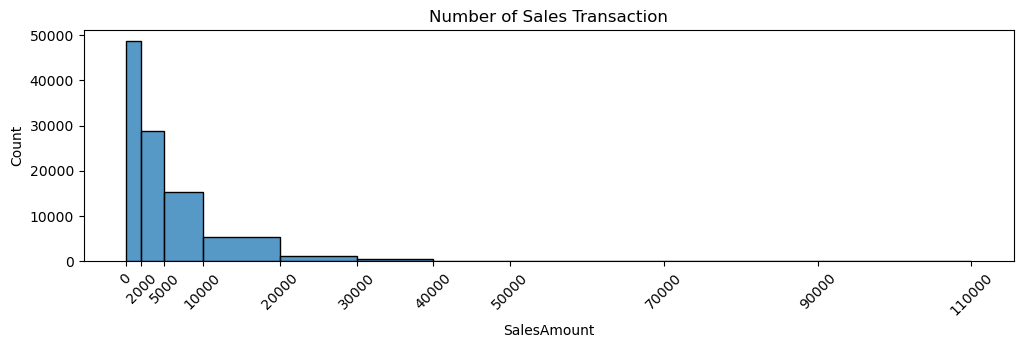

In [86]:
plt.figure(figsize=(12,3))
sns.histplot(data=df, x="SalesAmount",bins=[0,2000,5000,10000,20000,30000,40000,50000,70000,90000, 110000])
plt.xticks([0,2000,5000,10000,20000,30000,40000,50000,70000,90000, 110000], rotation=45)
plt.title('Number of Sales Transaction')
plt.show()

In [87]:
df.SalesAmount.describe()

count    100000.000000
mean       3657.471805
std        5366.176473
min           3.040000
25%         611.925000
50%        2100.200000
75%        4546.914000
max      135297.900000
Name: SalesAmount, dtype: float64

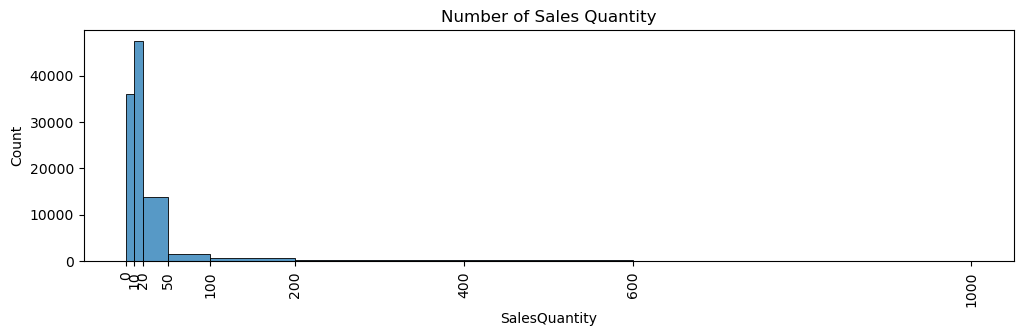

In [88]:
plt.figure(figsize=(12,3))
sns.histplot(data=df, x="SalesQuantity", bins= [0,10,20,50,100,200,400,600,1000])
plt.xticks([0,10,20,50,100,200,400,600,1000], rotation=90)
plt.title('Number of Sales Quantity')
plt.show()

In [89]:
df.SalesQuantity.describe()

count    100000.000000
mean         15.620010
std          32.649639
min           2.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: SalesQuantity, dtype: float64

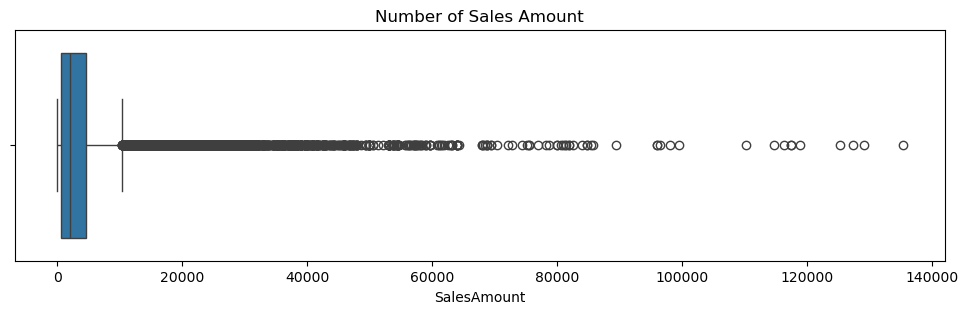

In [90]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df, x="SalesAmount")
plt.title('Number of Sales Amount')
plt.show()

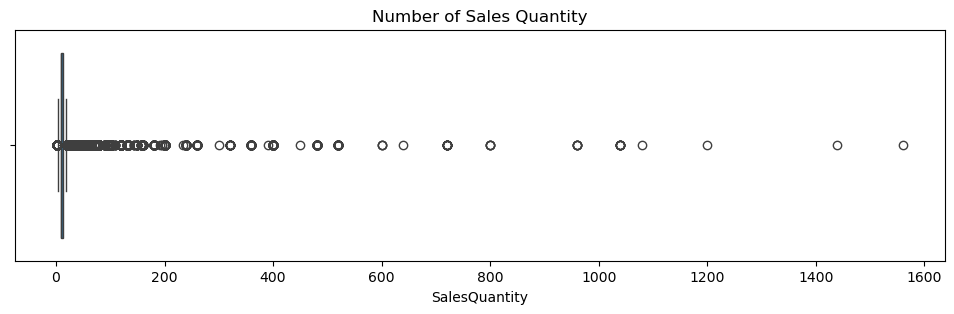

In [91]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df, x="SalesQuantity")
plt.title('Number of Sales Quantity')
plt.show()

### Channel analysis

In [92]:
ordersalesT= df.groupby("ChannelName")["SalesAmount"].sum().sort_values(ascending=False).index

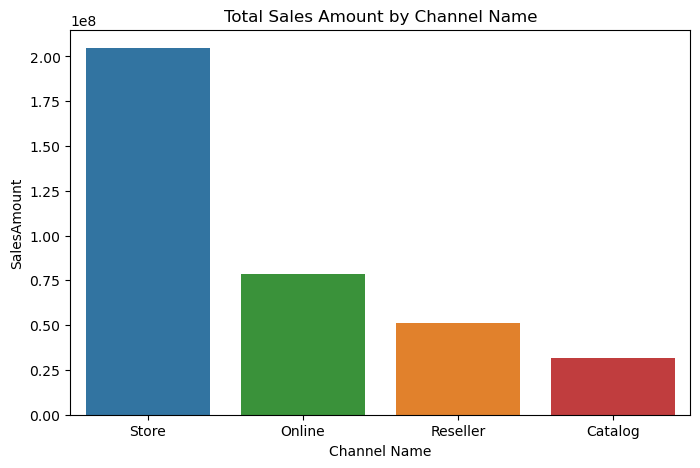

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, y="SalesAmount", x="ChannelName", hue="ChannelName",order= ordersalesT, estimator=sum, 
            errorbar= ("ci", False))
plt.xlabel('Channel Name')
plt.title('Total Sales Amount by Channel Name')
plt.show()

In [94]:
ordersalesA= df.groupby("ChannelName")["SalesAmount"].mean().sort_values(ascending=False).index

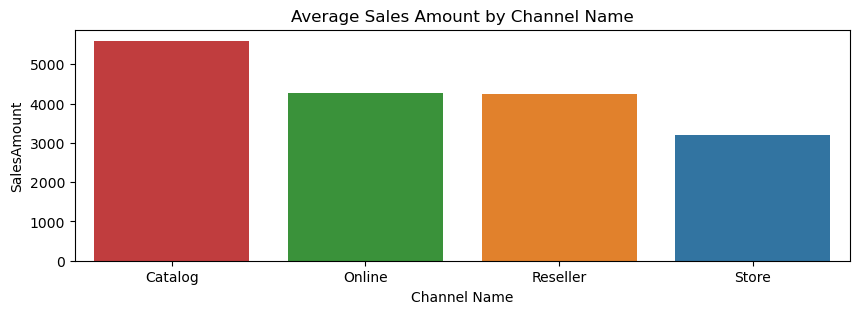

In [95]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, y="SalesAmount", x="ChannelName", hue="ChannelName", order= ordersalesA, errorbar= ("ci", False))
plt.xlabel('Channel Name')
plt.title('Average Sales Amount by Channel Name')
plt.show()

In [96]:
ordersqT= df.groupby("ChannelName")["SalesQuantity"].sum().sort_values(ascending=False).index

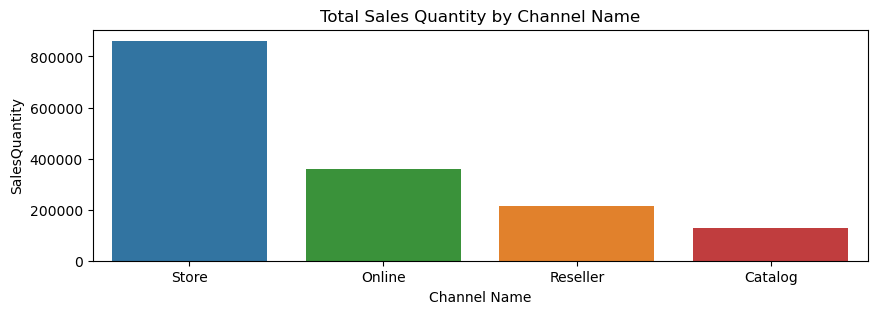

In [97]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, y="SalesQuantity", x="ChannelName", hue="ChannelName", order= ordersqT, estimator=sum, 
            errorbar= ("ci", False))
plt.title('Total Sales Quantity by Channel Name')
plt.xlabel('Channel Name')
plt.show()

In [98]:
ordersq= df.groupby("ChannelName")["SalesQuantity"].mean().sort_values(ascending=False).index

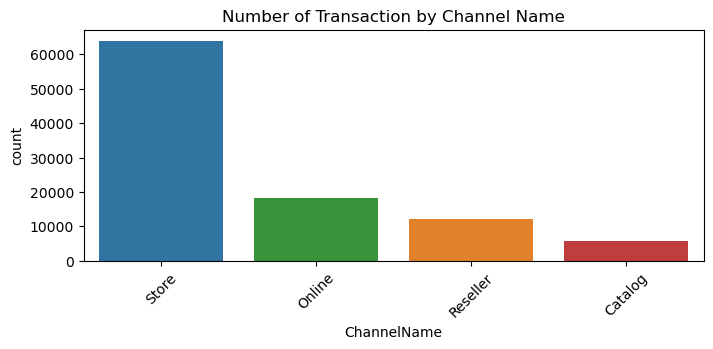

In [100]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x='ChannelName', hue='ChannelName', order= df['ChannelName'].value_counts().index)
plt.title('Number of Transaction by Channel Name')
plt.xticks(rotation=45)
plt.show()

In [101]:
import datetime as dt

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              100000 non-null  int64  
 1   SalesKey                100000 non-null  int64  
 2   DateKey                 100000 non-null  object 
 3   channelKey              100000 non-null  int64  
 4   StoreKey                100000 non-null  int64  
 5   ProductKey              100000 non-null  int64  
 6   PromotionKey            100000 non-null  int64  
 7   CurrencyKey             100000 non-null  int64  
 8   UnitCost_x              100000 non-null  float64
 9   UnitPrice_x             100000 non-null  float64
 10  SalesQuantity           100000 non-null  int64  
 11  ReturnQuantity          100000 non-null  int64  
 12  ReturnAmount            100000 non-null  float64
 13  DiscountQuantity        100000 non-null  int64  
 14  DiscountAmount       

In [103]:
df['DateKey']=pd.to_datetime(df.DateKey)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              100000 non-null  int64         
 1   SalesKey                100000 non-null  int64         
 2   DateKey                 100000 non-null  datetime64[ns]
 3   channelKey              100000 non-null  int64         
 4   StoreKey                100000 non-null  int64         
 5   ProductKey              100000 non-null  int64         
 6   PromotionKey            100000 non-null  int64         
 7   CurrencyKey             100000 non-null  int64         
 8   UnitCost_x              100000 non-null  float64       
 9   UnitPrice_x             100000 non-null  float64       
 10  SalesQuantity           100000 non-null  int64         
 11  ReturnQuantity          100000 non-null  int64         
 12  ReturnAmount            100000 

In [105]:
df['Year']= df.DateKey.dt.year

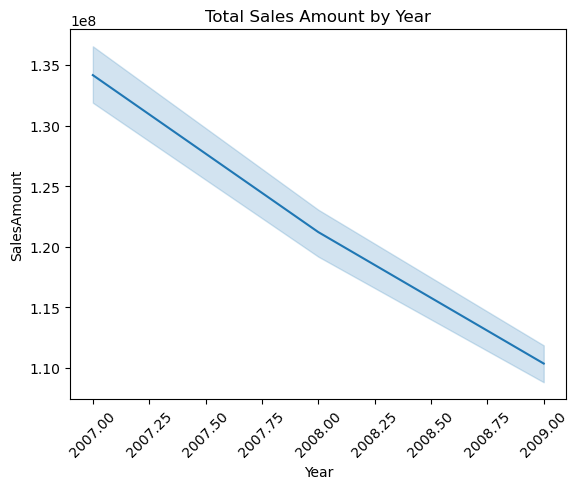

In [106]:
sns.lineplot(data=df, x='Year', y='SalesAmount',estimator=sum)
plt.title('Total Sales Amount by Year')
plt.xticks(rotation=45)
plt.show()

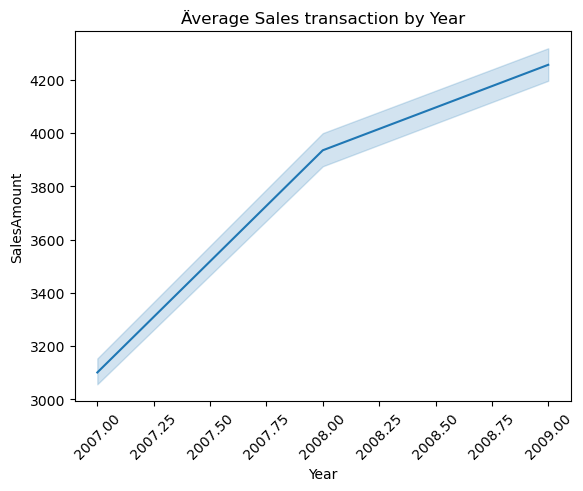

In [107]:
sns.lineplot(data=df, x='Year', y='SalesAmount')
plt.title("Äverage Sales transaction by Year")
plt.xticks(rotation=45)
plt.show()

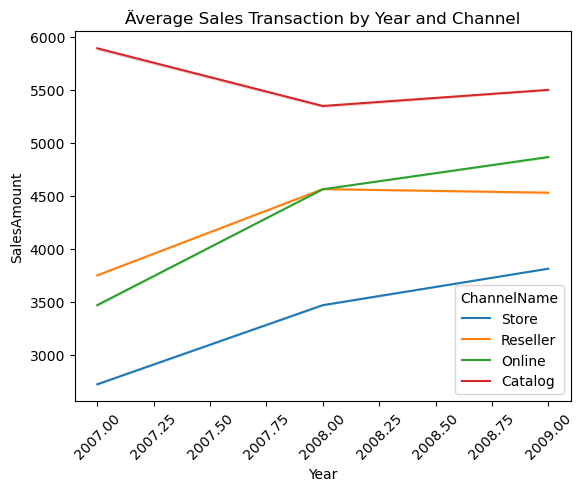

In [108]:
sns.lineplot(data=df, x='Year', y='SalesAmount',hue="ChannelName",errorbar=('ci',False))
plt.title("Äverage Sales Transaction by Year and Channel")
plt.xticks(rotation=45)
plt.show()

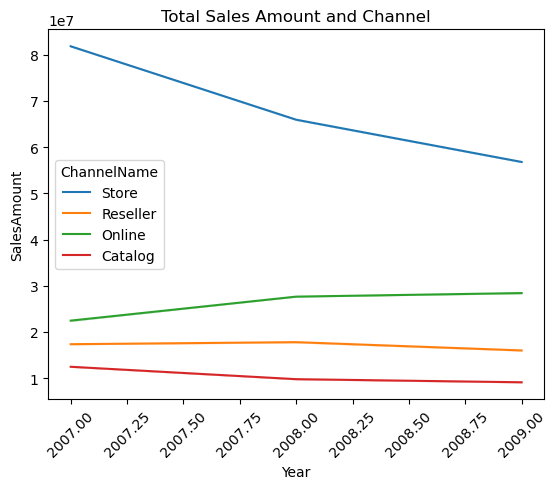

In [109]:
sns.lineplot(data=df, x='Year', y='SalesAmount',hue="ChannelName",errorbar=('ci',False),estimator=sum)
plt.title("Total Sales Amount and Channel")
plt.xticks(rotation=45)
plt.show()

In [110]:
orderstrip= df.groupby('ChannelName')["SalesAmount"].mean().sort_values(ascending=False).index

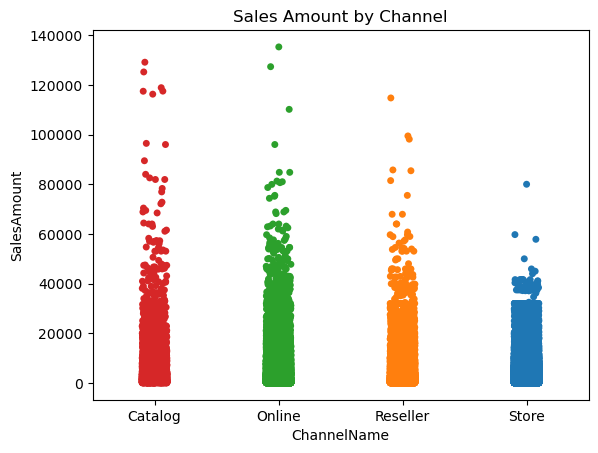

In [111]:
sns.stripplot(data=df,x="ChannelName",y="SalesAmount", hue="ChannelName", order= orderstrip)
plt.title("Sales Amount by Channel")
plt.show()

### Market Analysis

In [112]:
df.columns

Index(['Unnamed: 0', 'SalesKey', 'DateKey', 'channelKey', 'StoreKey',
       'ProductKey', 'PromotionKey', 'CurrencyKey', 'UnitCost_x',
       'UnitPrice_x', 'SalesQuantity', 'ReturnQuantity', 'ReturnAmount',
       'DiscountQuantity', 'DiscountAmount', 'TotalCost', 'SalesAmount',
       'ChannelName', 'GeographyKey', 'StoreManager', 'StoreType', 'StoreName',
       'Status_x', 'OpenDate', 'ZipCode', 'ZipCodeExtension', 'StorePhone',
       'StoreFax', 'AddressLine1', 'EmployeeCount', 'SellingAreaSize',
       'GeoLocation', 'Geometry_x', 'ProductName', 'ProductSubcategoryKey',
       'Manufacturer', 'ClassID', 'ClassName', 'StyleID', 'ColorID',
       'ColorName', 'WeightUnitMeasureID', 'UnitOfMeasureID',
       'UnitOfMeasureName', 'StockTypeName', 'UnitCost_y', 'UnitPrice_y',
       'AvailableForSaleDate', 'Status_y', 'ProductSubcategoryName',
       'ProductCategoryKey', 'ProductCategoryName', 'PromotionName',
       'DiscountPercent', 'PromotionType', 'PromotionCategory', 'StartDa

In [113]:
df1=df.groupby('ContinentName')['SalesAmount'].sum()

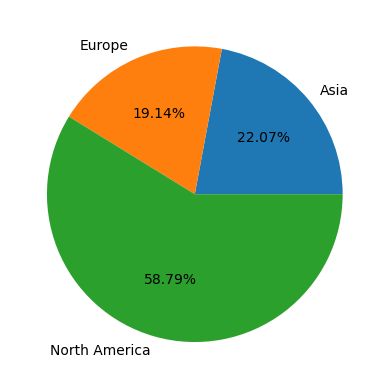

In [114]:
plt.pie(x=df1.values,labels=df1.index,autopct="%1.2f%%")
plt.show()

In [115]:
orderregM= df.groupby("RegionCountryName")["SalesAmount"].mean().sort_values(ascending=False).index

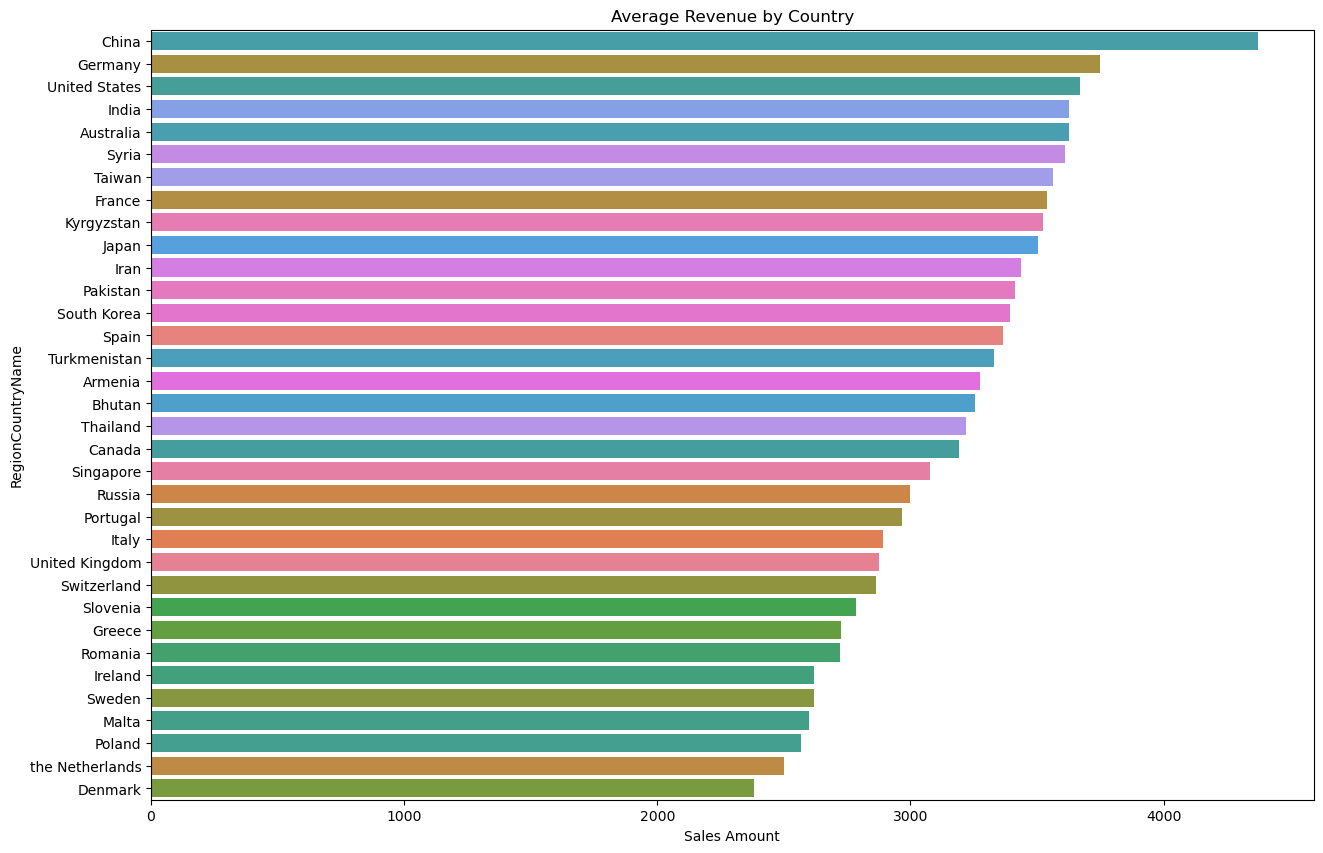

In [116]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, y="RegionCountryName", x="SalesAmount", hue="RegionCountryName", order= orderregM, errorbar=('ci', False))
plt.title('Average Revenue by Country')
plt.xlabel('Sales Amount')
plt.show()

In [117]:
orderreg= df.groupby("RegionCountryName")["SalesAmount"].sum().sort_values(ascending=False).index

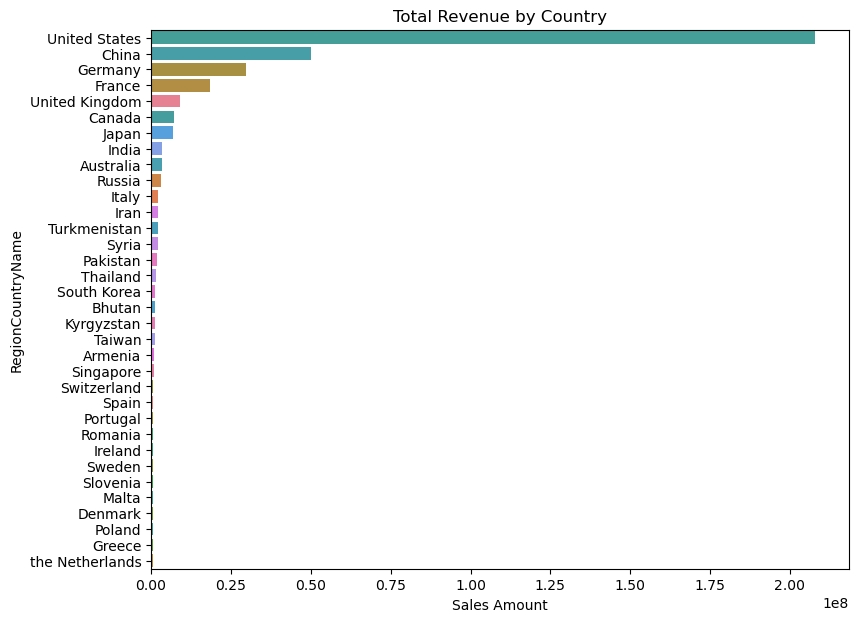

In [118]:
plt.figure(figsize=(9,7))
sns.barplot(data=df, y="RegionCountryName", x="SalesAmount", hue="RegionCountryName", estimator=sum, order= orderreg, 
            errorbar=('ci', False))
plt.title('Total Revenue by Country')
plt.xlabel('Sales Amount')
plt.show()

### Product Analysis

In [119]:
orderProdcat= df.groupby("ProductCategoryName")["SalesAmount"].sum().sort_values(ascending=False).index

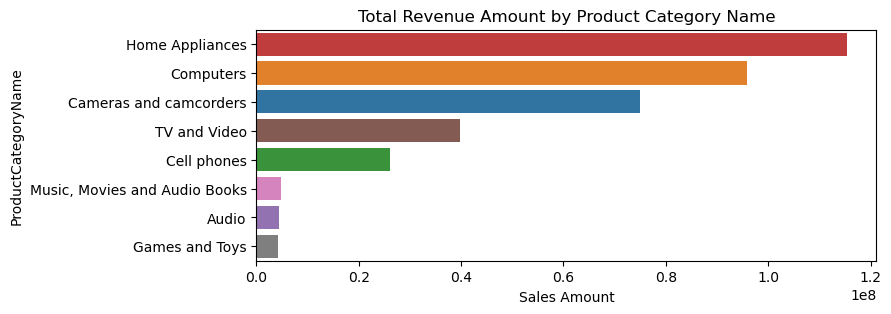

In [120]:
plt.figure(figsize=(8,3))
sns.barplot(data=df, y="ProductCategoryName", x="SalesAmount", hue="ProductCategoryName", estimator=sum, order= orderProdcat, 
            errorbar=('ci', False))
plt.title('Total Revenue Amount by Product Category Name')
plt.xlabel('Sales Amount')
plt.show()

In [121]:
orderSubT= df.groupby("ProductSubcategoryName")["SalesAmount"].sum().sort_values(ascending=False).index

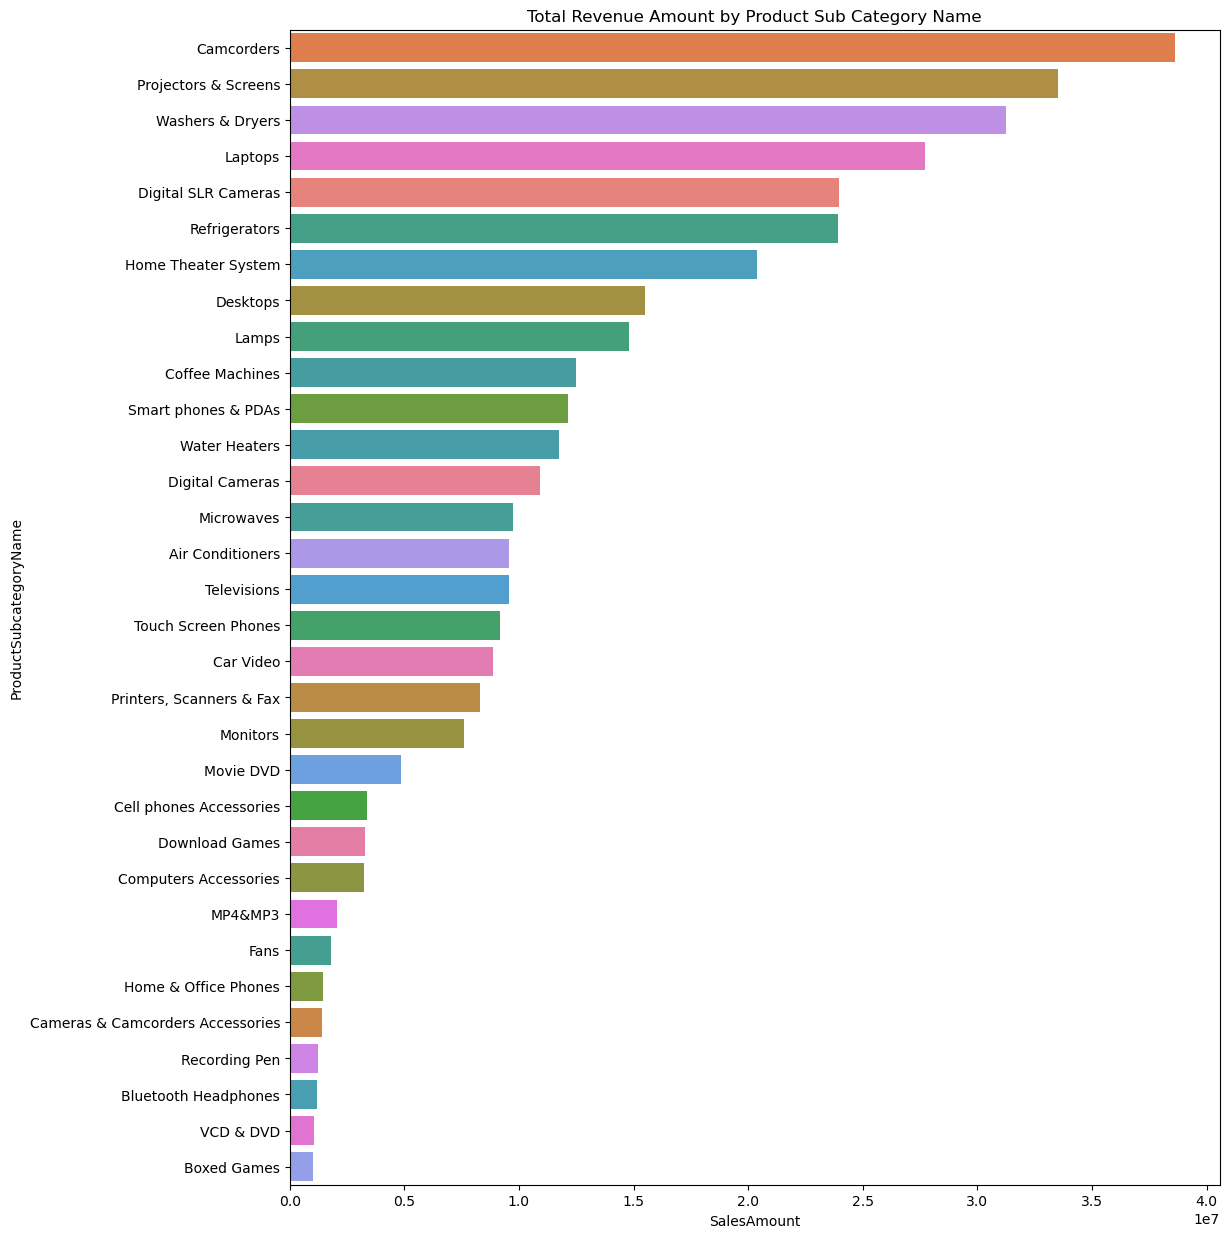

In [122]:
plt.figure(figsize=(12,15))
sns.barplot(data=df, y="ProductSubcategoryName", x="SalesAmount", hue="ProductSubcategoryName",
            estimator=sum, order=orderSubT, errorbar=('ci', False))
plt.title('Total Revenue Amount by Product Sub Category Name')
plt.show()

### Promotion Analysis

In [123]:
orderPromoS = df.groupby('PromotionName')['SalesAmount'].sum().sort_values(ascending=False).index

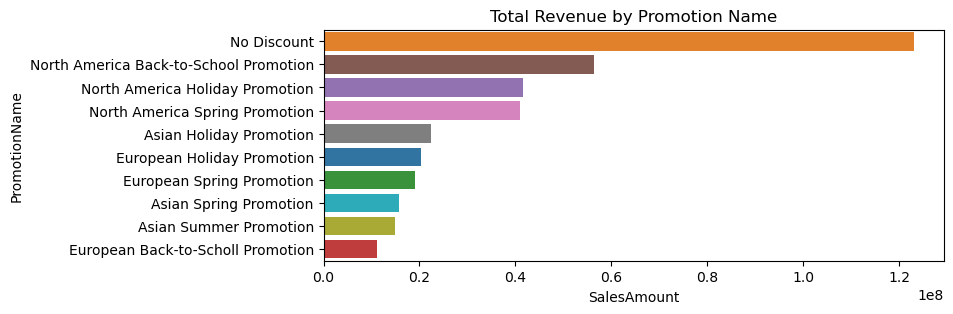

In [124]:
plt.figure(figsize=(8, 3))
sns.barplot(data=df, y='PromotionName', x='SalesAmount', hue='PromotionName', 
            estimator=sum, order=orderPromoS, errorbar=('ci', False))
plt.title('Total Revenue by Promotion Name')
plt.show()

In [125]:
orderPromo = df.groupby('PromotionName')['SalesAmount'].mean().sort_values(ascending=False).index

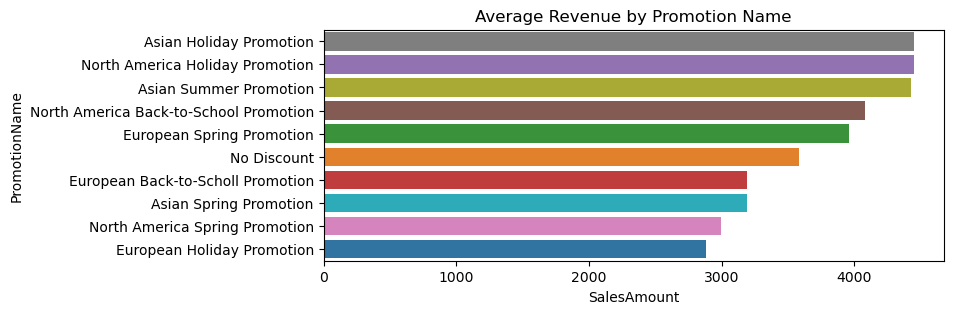

In [126]:
plt.figure(figsize=(8, 3))
sns.barplot(data=df, y='PromotionName', x='SalesAmount',  hue='PromotionName',
            order=orderPromo, errorbar=('ci', False))
plt.title('Average Revenue by Promotion Name')
plt.show()


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 65 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              100000 non-null  int64         
 1   SalesKey                100000 non-null  int64         
 2   DateKey                 100000 non-null  datetime64[ns]
 3   channelKey              100000 non-null  int64         
 4   StoreKey                100000 non-null  int64         
 5   ProductKey              100000 non-null  int64         
 6   PromotionKey            100000 non-null  int64         
 7   CurrencyKey             100000 non-null  int64         
 8   UnitCost_x              100000 non-null  float64       
 9   UnitPrice_x             100000 non-null  float64       
 10  SalesQuantity           100000 non-null  int64         
 11  ReturnQuantity          100000 non-null  int64         
 12  ReturnAmount            100000 

In [128]:
df_nums=df[['SalesQuantity','ReturnQuantity','ReturnAmount','DiscountQuantity','DiscountAmount',
            'TotalCost','SalesAmount','UnitCost_x','UnitPrice_x','UnitPrice_y','UnitCost_y']]

In [129]:
df_nums.corr()

,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,UnitCost_x,UnitPrice_x,UnitPrice_y,UnitCost_y
SalesQuantity,1.000000,0.028478,-0.014764,0.076804,-0.017224,0.092149,0.071122,-0.100095,-0.092415,-0.092415,-0.100095
ReturnQuantity,0.028478,1.000000,0.563819,0.061639,0.029690,0.027616,0.041871,-0.003649,-0.002508,-0.002508,-0.003649
ReturnAmount,-0.014764,0.563819,1.000000,0.035464,0.209018,0.260358,0.296128,0.293609,0.302902,0.302902,0.293609
DiscountQuantity,0.076804,0.061639,0.035464,1.000000,0.436929,0.117650,0.095520,-0.003248,-0.001578,-0.001578,-0.003248
DiscountAmount,-0.017224,0.029690,0.209018,0.436929,1.000000,0.495352,0.494540,0.477162,0.494220,0.494220,0.477162
TotalCost,0.092149,0.027616,0.260358,0.117650,0.495352,1.000000,0.975322,0.733428,0.726656,0.726656,0.733428
SalesAmount,0.071122,0.041871,0.296128,0.095520,0.494540,0.975322,1.000000,0.733055,0.766057,0.766057,0.733055
UnitCost_x,-0.100095,-0.003649,0.293609,-0.003248,0.477162,0.733428,0.733055,1.000000,0.974727,0.974727,1.000000
UnitPrice_x,-0.092415,-0.002508,0.302902,-0.001578,0.494220,0.726656,0.766057,0.974727,1.000000,1.000000,0.974727
UnitPrice_y,-0.092415,-0.002508,0.302902,-0.001578,0.494220,0.726656,0.766057,0.974727,1.000000,1.000000,0.974727


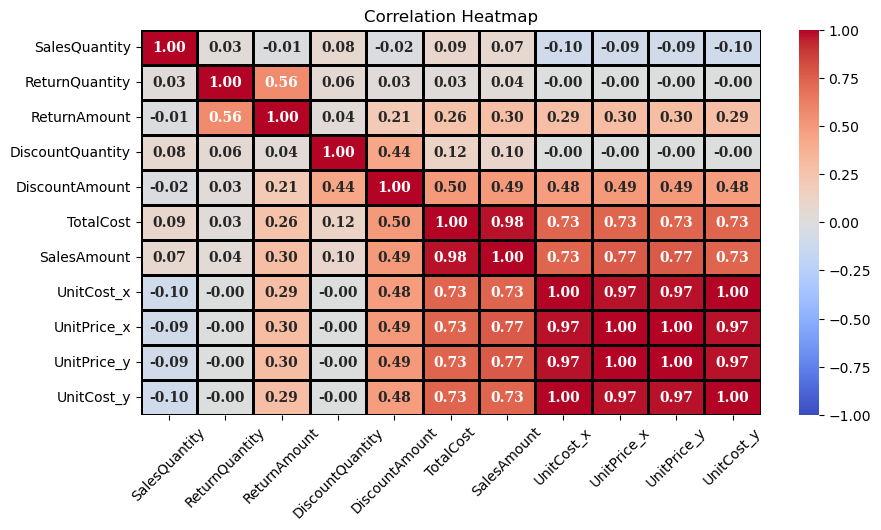

In [130]:
plt.figure(figsize=(10,5))
sns.heatmap(df_nums.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True,
            fmt='0.2f',annot_kws={"fontsize":10,"fontweight":"bold","fontfamily":"serif"},linewidth=1,linecolor="black")
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

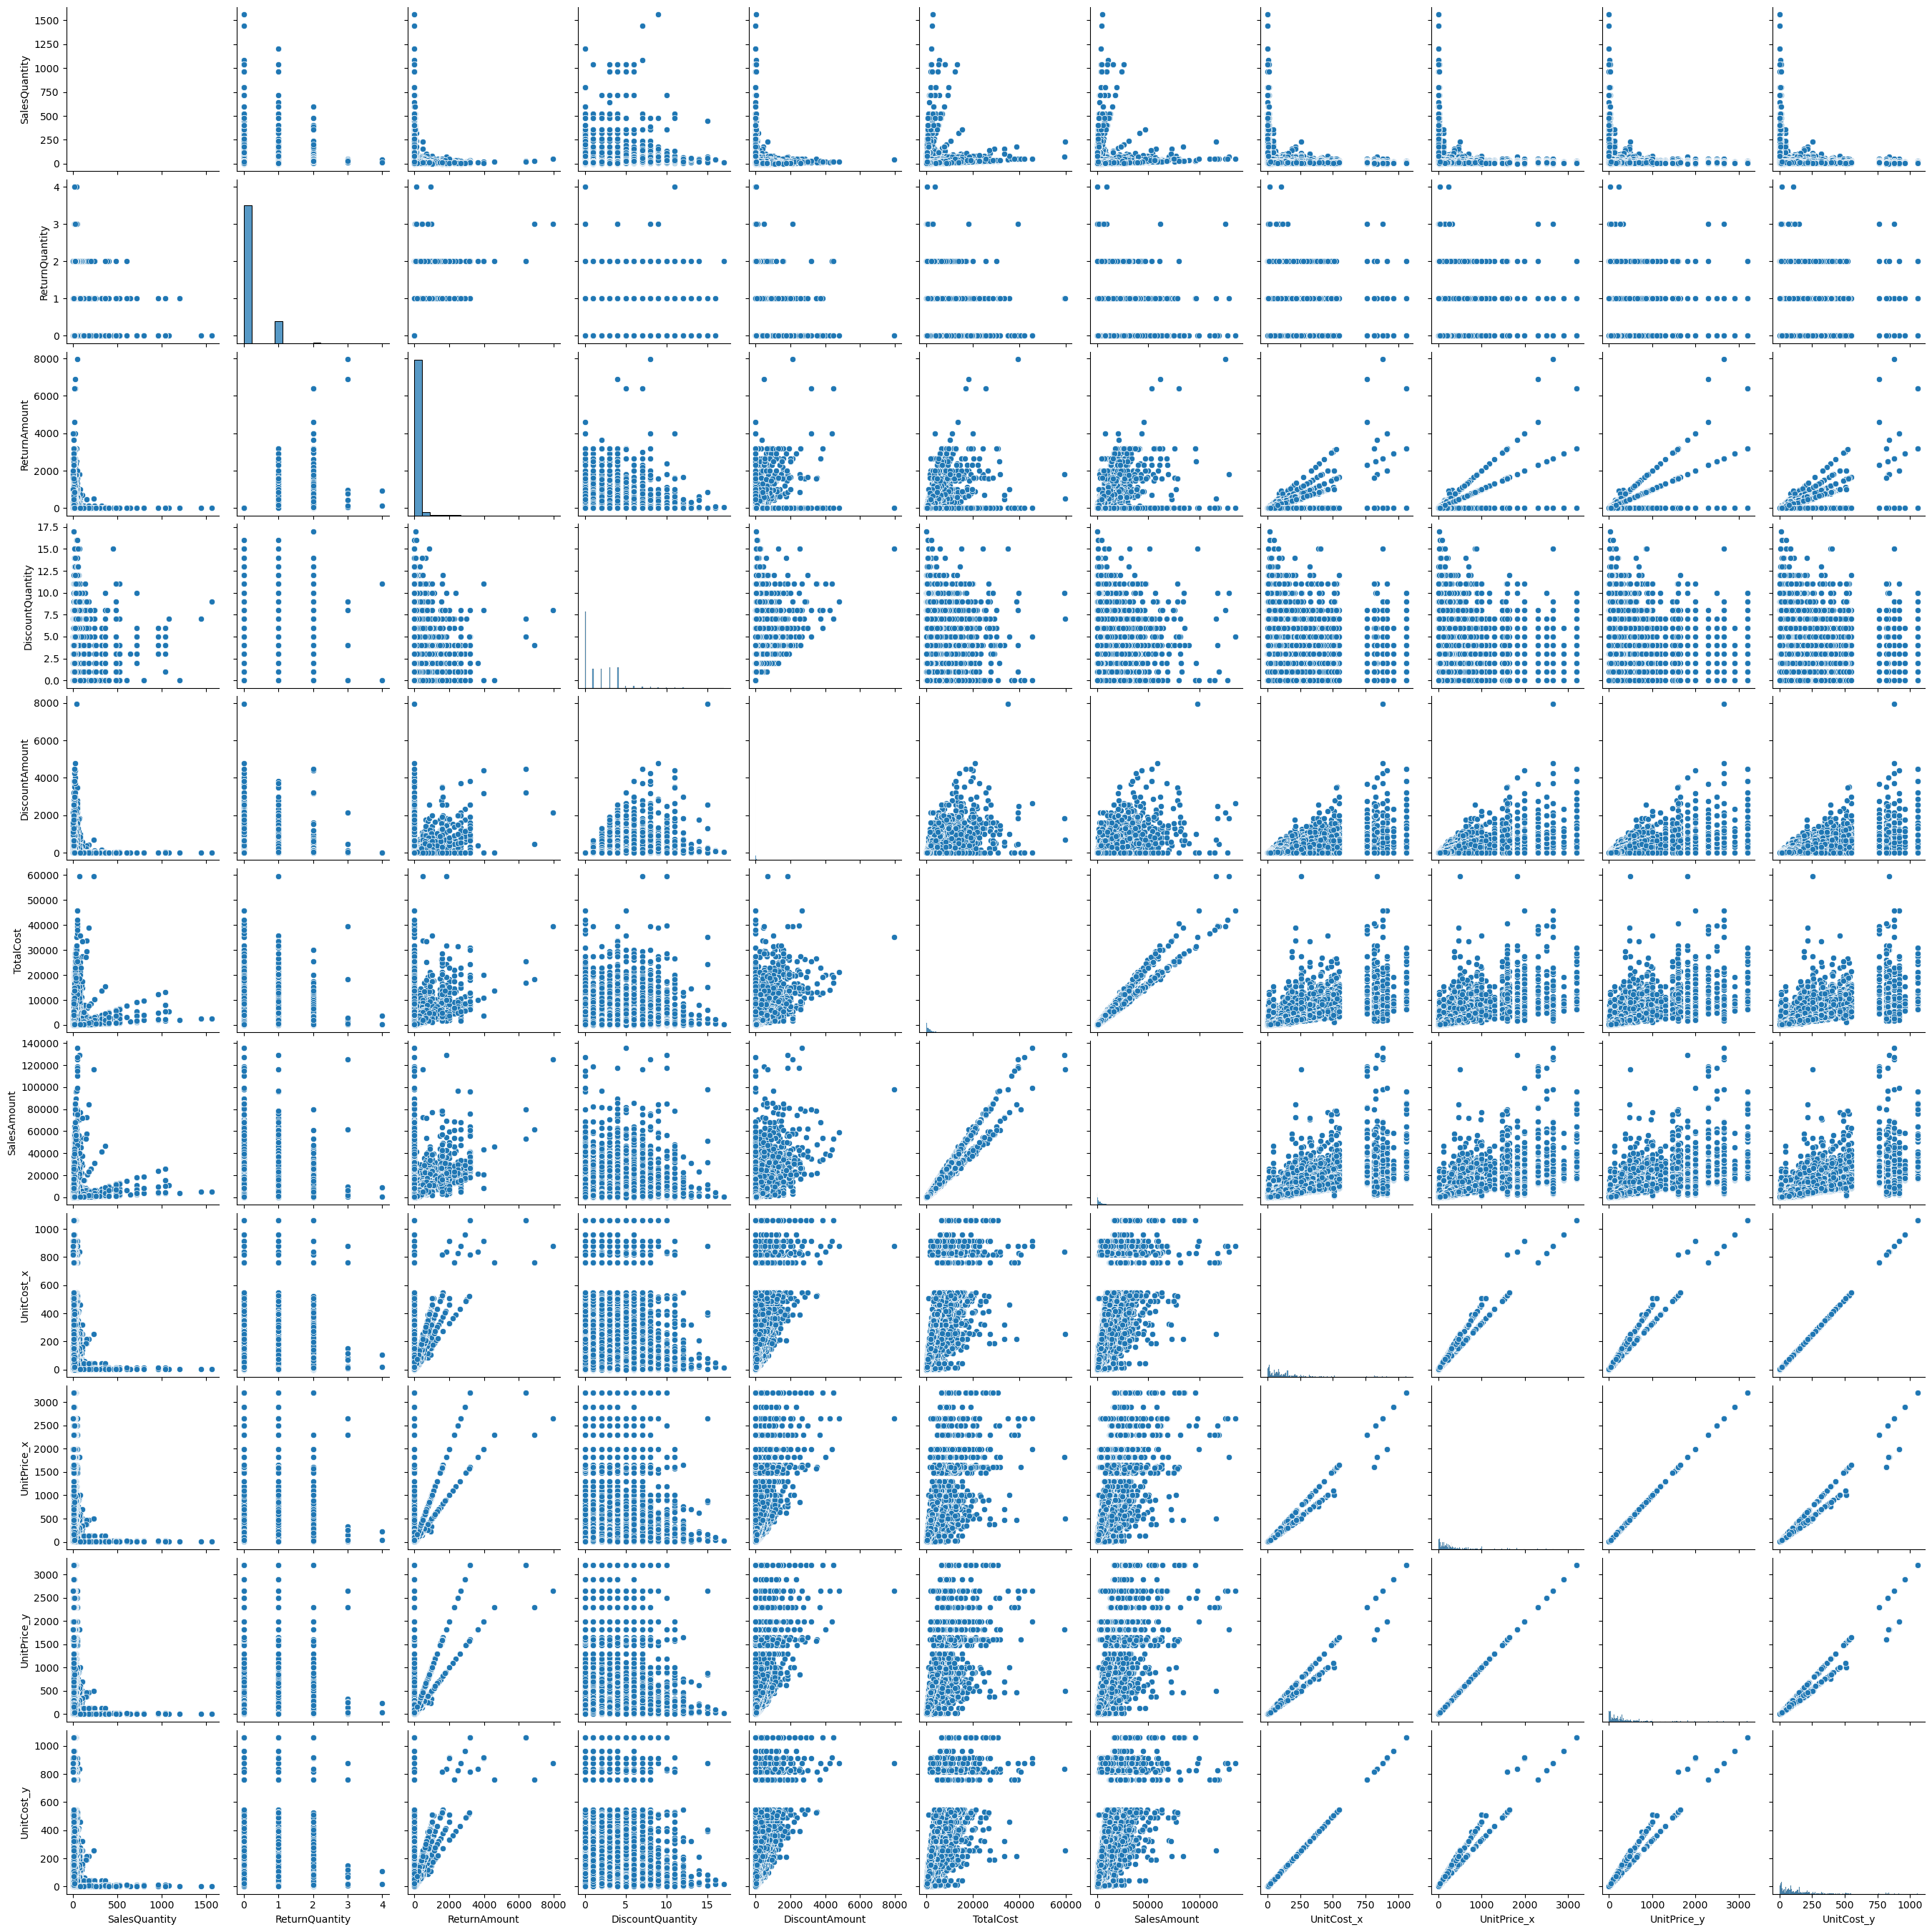

In [131]:
sns.pairplot(df_nums)
plt.show()

### Color Name Analysis

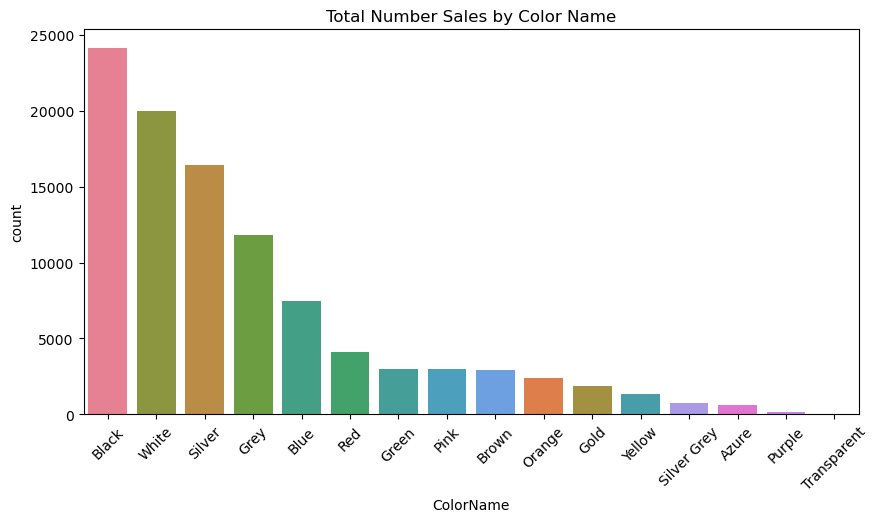

In [132]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="ColorName", hue="ColorName", order=df['ColorName'].value_counts().index)
plt.title('Total Number Sales by Color Name')
plt.xticks(rotation=45)
plt.show()

### Top Sales personnel

In [133]:
salesP= pd.read_excel('capstone.xlsx', sheet_name="DimSalesPerson")

In [134]:
salesP.head()

,SalesPersonKey,FirstName,LastName
0,6486,Chloe,Young
1,6487,Latasha,Suarez
2,6488,Larry,Gill
3,6499,Geoffrey,Gonzalez
4,6506,Edgar,Sanchez


In [135]:
dimsales= pd.read_excel('capstone.xlsx', sheet_name="DimSales")

In [136]:
dimsales.head()

,SalesKey,DateKey,SalesPersonKey,SalesQuantity,SalesAmount,ReturnQuantity,ReturnAmount
0,19570952,2010-04-21,19079,1,12.7415,0,0
1,19570953,2010-04-22,19079,1,12.7415,0,0
2,19570954,2010-04-23,19079,1,12.7415,0,0
3,19570955,2010-04-24,19079,1,12.7415,0,0
4,19570956,2010-04-25,19079,1,12.7415,0,0


In [137]:
dimsales1= pd.merge(dimsales, salesP, on="SalesPersonKey")

In [138]:
dimsales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SalesKey        14998 non-null  int64         
 1   DateKey         14998 non-null  datetime64[ns]
 2   SalesPersonKey  14998 non-null  int64         
 3   SalesQuantity   14998 non-null  int64         
 4   SalesAmount     14998 non-null  float64       
 5   ReturnQuantity  14998 non-null  int64         
 6   ReturnAmount    14998 non-null  int64         
 7   FirstName       14998 non-null  object        
 8   LastName        14998 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 1.0+ MB


In [139]:
dimsales1['fullname'] = dimsales1['FirstName'] + ' ' + dimsales1['LastName']

In [140]:
dimsales1.head()

,SalesKey,DateKey,SalesPersonKey,SalesQuantity,SalesAmount,ReturnQuantity,ReturnAmount,FirstName,LastName,fullname
0,19570952,2010-04-21,19079,1,12.7415,0,0,Tyrone,Blanco,Tyrone Blanco
1,19570953,2010-04-22,19079,1,12.7415,0,0,Tyrone,Blanco,Tyrone Blanco
2,19570954,2010-04-23,19079,1,12.7415,0,0,Tyrone,Blanco,Tyrone Blanco
3,19570955,2010-04-24,19079,1,12.7415,0,0,Tyrone,Blanco,Tyrone Blanco
4,19570956,2010-04-25,19079,1,12.7415,0,0,Tyrone,Blanco,Tyrone Blanco


In [141]:
dimsales1.describe()

,SalesKey,DateKey,SalesPersonKey,SalesQuantity,SalesAmount,ReturnQuantity,ReturnAmount
count,1.499800e+04,14998,14998.000000,14998.0,14998.000000,14998.0,14998.0
mean,1.957297e+07,2015-09-02 19:30:52.567008768,9358.241699,1.0,236.342970,0.0,0.0
min,1.956048e+07,2010-01-01 00:00:00,2.000000,1.0,2.847500,0.0,0.0
25%,1.956723e+07,2012-10-27 06:00:00,477.000000,1.0,36.550000,0.0,0.0
50%,1.957288e+07,2015-11-26 00:00:00,3097.000000,1.0,159.200000,0.0,0.0
75%,1.957901e+07,2018-06-19 00:00:00,19079.000000,1.0,286.400000,0.0,0.0
max,1.958548e+07,2021-01-31 00:00:00,19079.000000,1.0,2520.255000,0.0,0.0
std,6.980874e+03,NaN,9019.461027,0.0,311.027466,0.0,0.0


In [142]:
dimsales1.drop(["FirstName","LastName","ReturnQuantity","ReturnAmount"], axis=1, inplace=True)

In [143]:
dimsales1.head()

,SalesKey,DateKey,SalesPersonKey,SalesQuantity,SalesAmount,fullname
0,19570952,2010-04-21,19079,1,12.7415,Tyrone Blanco
1,19570953,2010-04-22,19079,1,12.7415,Tyrone Blanco
2,19570954,2010-04-23,19079,1,12.7415,Tyrone Blanco
3,19570955,2010-04-24,19079,1,12.7415,Tyrone Blanco
4,19570956,2010-04-25,19079,1,12.7415,Tyrone Blanco


In [144]:
ds1= dimsales1.groupby('fullname')['SalesAmount'].sum().sort_values(ascending=False).head(5).index

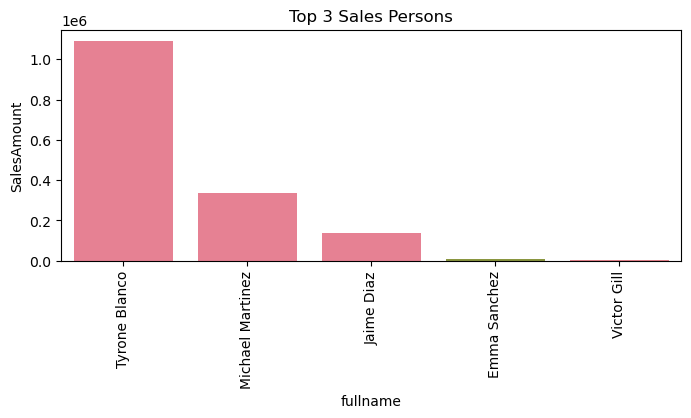

In [145]:
plt.figure(figsize=(8, 3))
sns.barplot(data=dimsales1, y='SalesAmount', x='fullname', hue='fullname', estimator=sum, order=ds1, errorbar=('ci', False))
plt.title('Top 3 Sales Persons')
plt.xticks(rotation=90)
plt.show()

### Employee Analysis

In [146]:
emp= pd.read_excel('capstone.xlsx', sheet_name="DimEmployee")

In [147]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeKey              293 non-null    int64         
 1   ParentEmployeeKey        292 non-null    float64       
 2   FirstName                293 non-null    object        
 3   LastName                 293 non-null    object        
 4   MiddleName               14 non-null     object        
 5   Title                    0 non-null      float64       
 6   HireDate                 293 non-null    datetime64[ns]
 7   BirthDate                293 non-null    datetime64[ns]
 8   EmailAddress             293 non-null    object        
 9   Phone                    293 non-null    object        
 10  MaritalStatus            293 non-null    object        
 11  EmergencyContactName     293 non-null    object        
 12  EmergencyContactPhone    293 non-nul

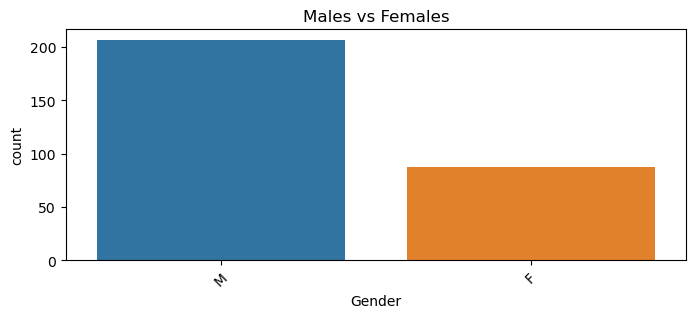

In [148]:
plt.figure(figsize=(8,3))
sns.countplot(data=emp, x='Gender', hue='Gender')
plt.title('Males vs Females')
plt.xticks(rotation=45)
plt.show()

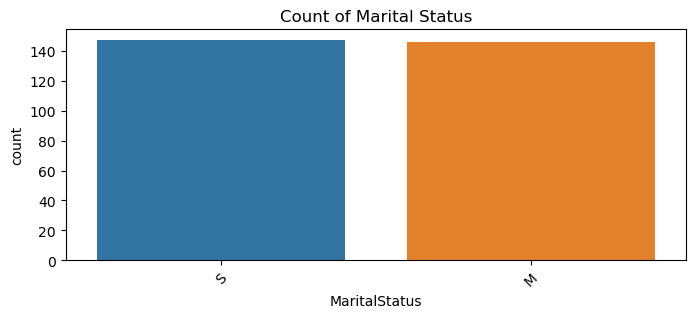

In [149]:
plt.figure(figsize=(8,3))
sns.countplot(data=emp, x='MaritalStatus', hue='MaritalStatus')
plt.title('Count of Marital Status')
plt.xticks(rotation=45)
plt.show()

In [150]:
emp.MaritalStatus.value_counts()

MaritalStatus
S    147
M    146
Name: count, dtype: int64

### Customer Analysis

In [151]:
cust= pd.read_csv('customer_final.csv')

In [152]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18869 non-null  int64  
 1   CustomerKey           18869 non-null  int64  
 2   GeographyKey          18869 non-null  int64  
 3   FirstName             18484 non-null  object 
 4   MiddleName            10654 non-null  object 
 5   LastName              18484 non-null  object 
 6   BirthDate             18484 non-null  object 
 7   MaritalStatus         18484 non-null  object 
 8   Gender                18484 non-null  object 
 9   EmailAddress          18484 non-null  object 
 10  YearlyIncome          18869 non-null  int64  
 11  TotalChildren         18484 non-null  float64
 12  NumberChildrenAtHome  18484 non-null  float64
 13  Education             18484 non-null  object 
 14  Occupation            18484 non-null  object 
 15  HouseOwnerFlag     

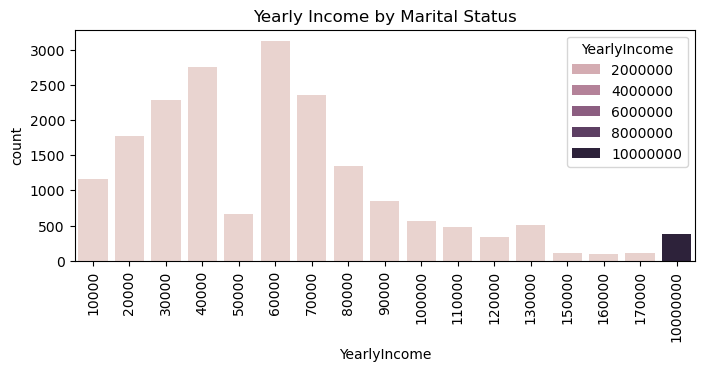

In [153]:
plt.figure(figsize=(8,3))
sns.countplot(data=cust, x='YearlyIncome', hue='YearlyIncome')
plt.title('Yearly Income by Marital Status')
plt.xticks(rotation=90)
plt.show()

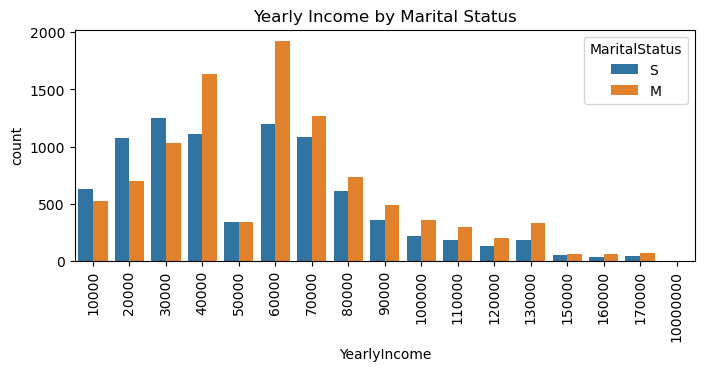

In [154]:
plt.figure(figsize=(8,3))
sns.countplot(data=cust, x='YearlyIncome', hue='MaritalStatus')
plt.title('Yearly Income by Marital Status')
plt.xticks(rotation=90)
plt.show()

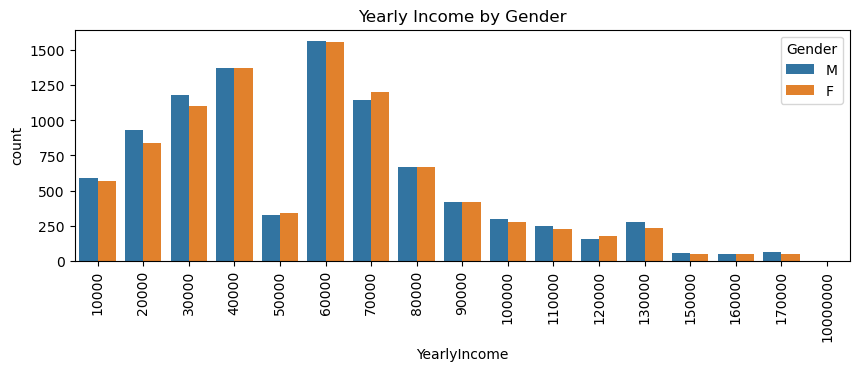

In [155]:
plt.figure(figsize=(10,3))
sns.countplot(data=cust, x='YearlyIncome', hue='Gender')
plt.title('Yearly Income by Gender')
plt.xticks(rotation=90)
plt.show()

### Activity 5

In [156]:
df= pd.read_csv('anomaly.csv')

In [157]:
df.shape

(1076691, 51)

In [158]:
df.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,UnitCost_x,UnitPrice_x,SalesQuantity,ReturnQuantity,...,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName,YearlyIncome,CustomerType,Rating,Scored Labels,Scored Probabilities
0,69236,12/13/2008 12:00:00 AM,4,309,1916,19,413.42,899.00,16,0,...,City,Europe,Paris,Seine (Paris),France,20000,Person,3,1.0,0.513770
1,55270,6/3/2009 12:00:00 AM,1,212,2112,1,363.75,791.00,10,0,...,City,Europe,Liverpool,England,United Kingdom,30000,Person,1,1.0,0.826713
2,85557,5/7/2009 12:00:00 AM,4,308,379,1,166.20,326.00,60,1,...,City,North America,Seattle,Washington,United States,60000,Person,5,1.0,0.800117
3,97543,1/4/2007 12:00:00 AM,4,309,1402,10,20.15,43.81,8,0,...,City,Europe,Paris,Seine (Paris),France,110000,Person,1,1.0,0.526289
4,56181,10/20/2009 12:00:00 AM,1,15,2163,1,66.23,129.90,20,0,...,City,North America,Renton,Washington,United States,50000,Person,3,1.0,0.878681


In [159]:
df.columns

Index(['SalesKey', 'DateKey', 'channelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'UnitCost_x', 'UnitPrice_x', 'SalesQuantity',
       'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'ChannelName', 'GeographyKey',
       'StoreManager', 'StoreType', 'StoreName', 'Status_x', 'OpenDate',
       'EmployeeCount', 'SellingAreaSize', 'ProductName',
       'ProductSubcategoryKey', 'Manufacturer', 'ClassName', 'ColorName',
       'WeightUnitMeasureID', 'StockTypeName', 'AvailableForSaleDate',
       'ProductSubcategoryName', 'ProductCategoryKey', 'ProductCategoryName',
       'PromotionName', 'DiscountPercent', 'PromotionType',
       'PromotionCategory', 'StartDate', 'EndDate', 'GeographyType',
       'ContinentName', 'CityName', 'StateProvinceName', 'RegionCountryName',
       'YearlyIncome', 'CustomerType', 'Rating', 'Scored Labels',
       'Scored Probabilities'],
      dtype='object')

In [160]:
df['Scored Labels'].value_counts()

Scored Labels
1.0    936610
0.0     32297
Name: count, dtype: int64

In [161]:
df['is_fraud']= df['Scored Labels'].map({0:1, 1:0})

In [162]:
df['is_fraud'].value_counts()

is_fraud
0.0    936610
1.0     32297
Name: count, dtype: int64

In [163]:
df.drop(columns= ['Scored Labels','Scored Probabilities'], inplace=True)

In [164]:
df1= df.sample(50000)

In [165]:
df1.shape

(50000, 50)

In [166]:
df1.columns

Index(['SalesKey', 'DateKey', 'channelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'UnitCost_x', 'UnitPrice_x', 'SalesQuantity',
       'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'ChannelName', 'GeographyKey',
       'StoreManager', 'StoreType', 'StoreName', 'Status_x', 'OpenDate',
       'EmployeeCount', 'SellingAreaSize', 'ProductName',
       'ProductSubcategoryKey', 'Manufacturer', 'ClassName', 'ColorName',
       'WeightUnitMeasureID', 'StockTypeName', 'AvailableForSaleDate',
       'ProductSubcategoryName', 'ProductCategoryKey', 'ProductCategoryName',
       'PromotionName', 'DiscountPercent', 'PromotionType',
       'PromotionCategory', 'StartDate', 'EndDate', 'GeographyType',
       'ContinentName', 'CityName', 'StateProvinceName', 'RegionCountryName',
       'YearlyIncome', 'CustomerType', 'Rating', 'is_fraud'],
      dtype='object')

In [167]:
df1.is_fraud.value_counts()

is_fraud
0.0    43504
1.0     1509
Name: count, dtype: int64

In [168]:
df1.to_csv('anomaly_final.csv')

### Activity 7 : Interpretability
•	Develop visualization and explanation methods for model predictions.

In [169]:
df= pd.read_csv('anomaly_final.csv')

In [170]:
df.columns

Index(['Unnamed: 0', 'SalesKey', 'DateKey', 'channelKey', 'StoreKey',
       'ProductKey', 'PromotionKey', 'UnitCost_x', 'UnitPrice_x',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount', 'ChannelName',
       'GeographyKey', 'StoreManager', 'StoreType', 'StoreName', 'Status_x',
       'OpenDate', 'EmployeeCount', 'SellingAreaSize', 'ProductName',
       'ProductSubcategoryKey', 'Manufacturer', 'ClassName', 'ColorName',
       'WeightUnitMeasureID', 'StockTypeName', 'AvailableForSaleDate',
       'ProductSubcategoryName', 'ProductCategoryKey', 'ProductCategoryName',
       'PromotionName', 'DiscountPercent', 'PromotionType',
       'PromotionCategory', 'StartDate', 'EndDate', 'GeographyType',
       'ContinentName', 'CityName', 'StateProvinceName', 'RegionCountryName',
       'YearlyIncome', 'CustomerType', 'Rating', 'is_fraud'],
      dtype='object')

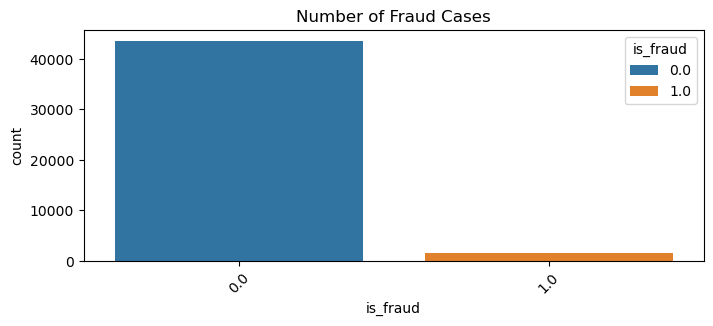

In [171]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x='is_fraud', hue='is_fraud')
plt.title('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.show()

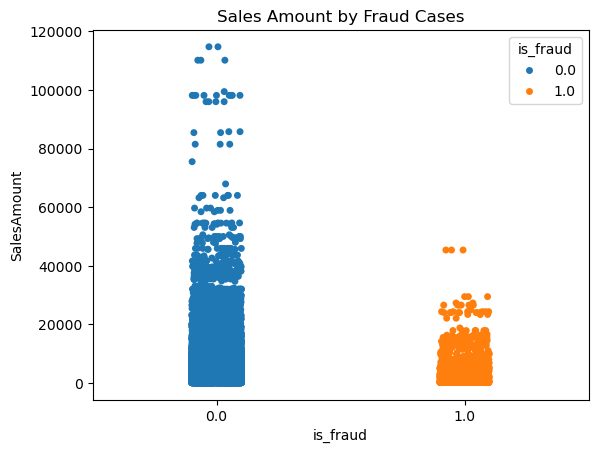

In [172]:
sns.stripplot(data=df,x='is_fraud',y="SalesAmount", hue="is_fraud")
plt.title("Sales Amount by Fraud Cases")
plt.show()

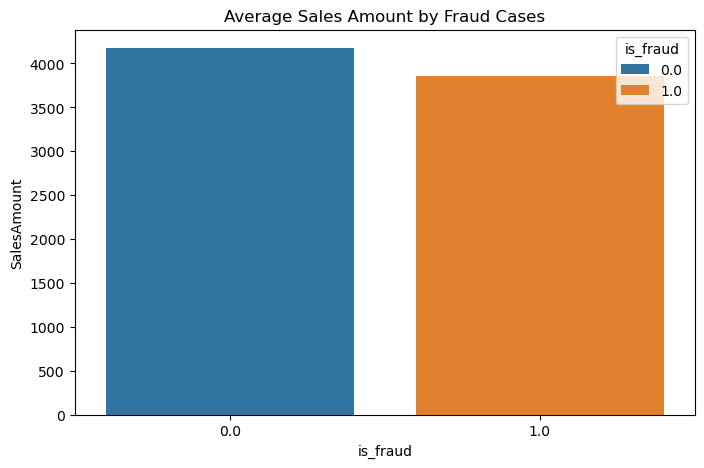

In [173]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='is_fraud',y="SalesAmount", hue="is_fraud", errorbar= ("ci", False))
plt.xlabel('is_fraud')
plt.title('Average Sales Amount by Fraud Cases')
plt.show()

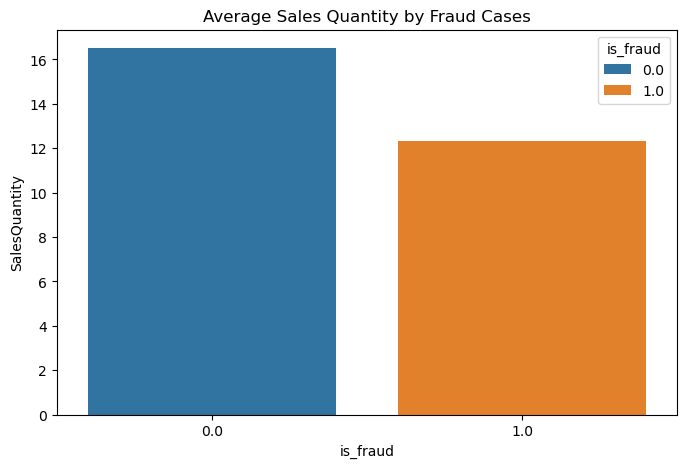

In [174]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='is_fraud',y="SalesQuantity", hue="is_fraud", errorbar= ("ci", False))
plt.xlabel('is_fraud')
plt.title('Average Sales Quantity by Fraud Cases')
plt.show()

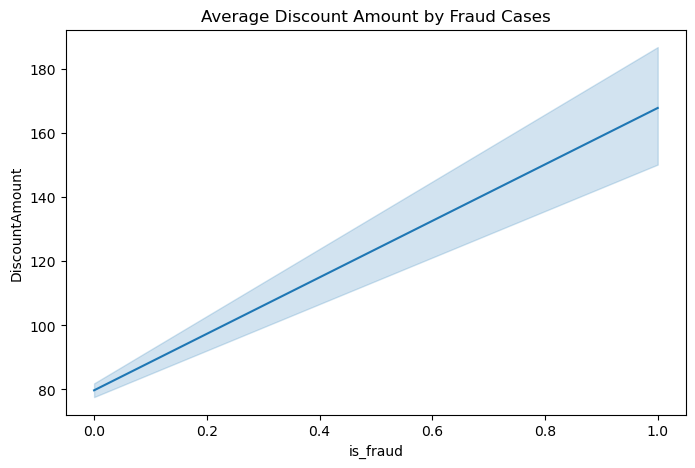

In [176]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='is_fraud',y="DiscountAmount")
plt.xlabel('is_fraud')
plt.title('Average Discount Amount by Fraud Cases')
plt.show()

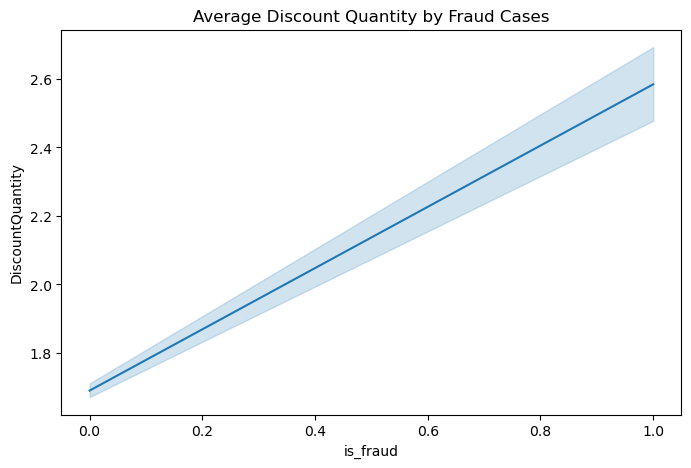

In [177]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='is_fraud',y="DiscountQuantity")
plt.xlabel('is_fraud')
plt.title('Average Discount Quantity by Fraud Cases')
plt.show()

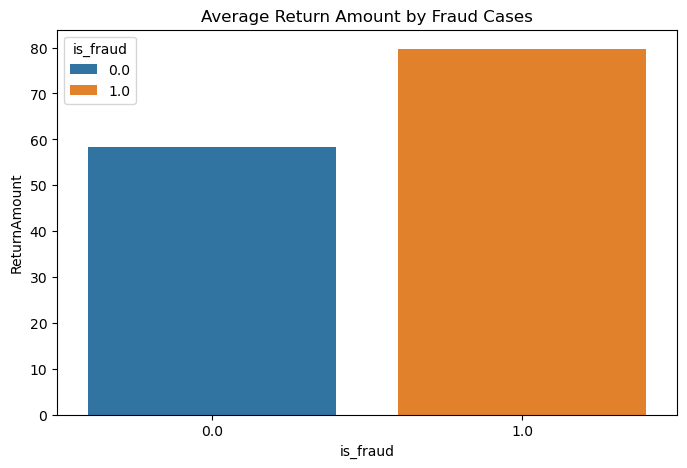

In [179]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='is_fraud',y="ReturnAmount", hue="is_fraud", errorbar= ("ci", False))
plt.xlabel('is_fraud')
plt.title('Average Return Amount by Fraud Cases')
plt.show()

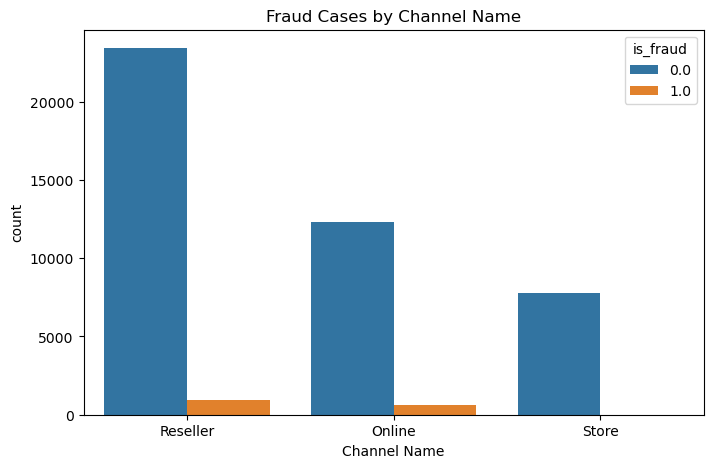

In [180]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ChannelName', hue="is_fraud")
plt.xlabel('Channel Name')
plt.title('Fraud Cases by Channel Name')
plt.show()

In [181]:
orderregN= df.groupby("RegionCountryName")["is_fraud"].mean().sort_values(ascending=False).index

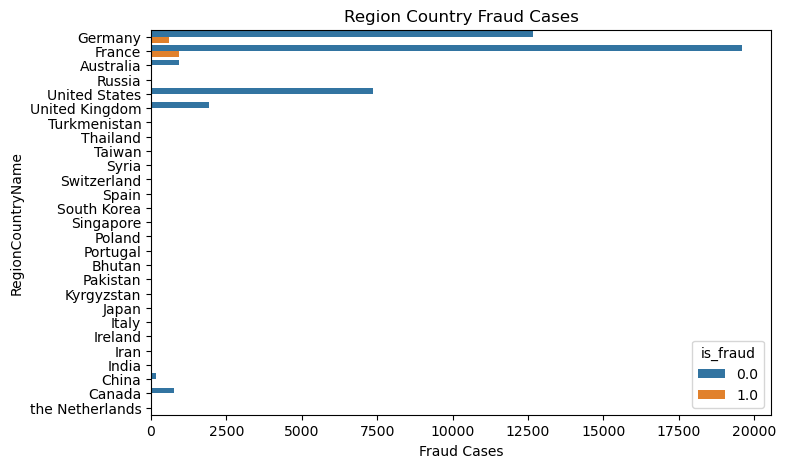

In [198]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='RegionCountryName',hue="is_fraud", order= orderregN)
plt.xlabel('Fraud Cases')
plt.title('Region Country Fraud Cases')
plt.show()

In [183]:
ordercityN= df.groupby("CityName")["is_fraud"].mean().sort_values(ascending=False).head(5).index

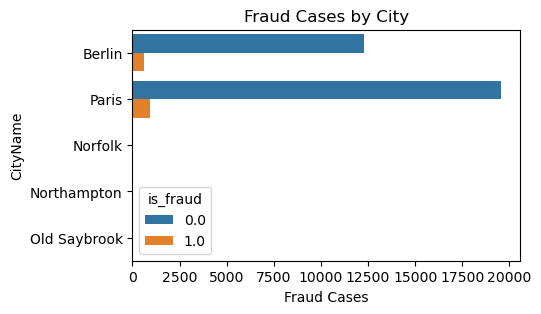

In [209]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, y='CityName',hue="is_fraud",order= ordercityN)
plt.xlabel('Fraud Cases')
plt.title('Fraud Cases by City')
plt.show()

In [185]:
orderprocatN= df.groupby("ProductCategoryName")["is_fraud"].mean().sort_values(ascending=False).index

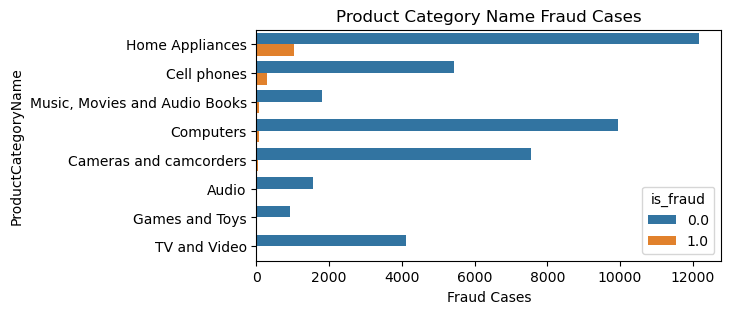

In [208]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, y='ProductCategoryName',hue="is_fraud", order= orderprocatN)
plt.xlabel('Fraud Cases')
plt.title('Product Category Name Fraud Cases')
plt.show()

In [187]:
orderprosubcatN= df.groupby("ProductSubcategoryName")["is_fraud"].mean().sort_values(ascending=False).head(10).index

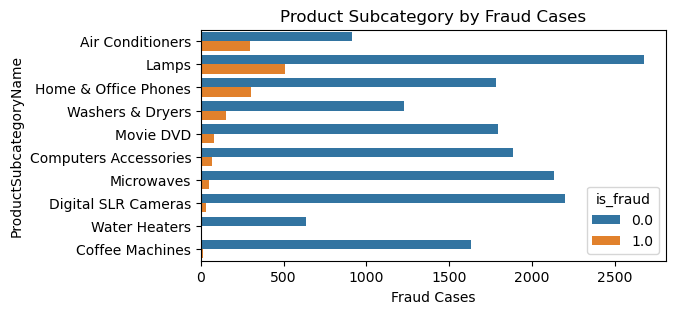

In [207]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, y='ProductSubcategoryName',hue="is_fraud", order= orderprosubcatN)
plt.xlabel('Fraud Cases')
plt.title('Product Subcategory by Fraud Cases')
plt.show()

In [189]:
orderpromN= df.groupby("PromotionName")["is_fraud"].mean().sort_values(ascending=False).index

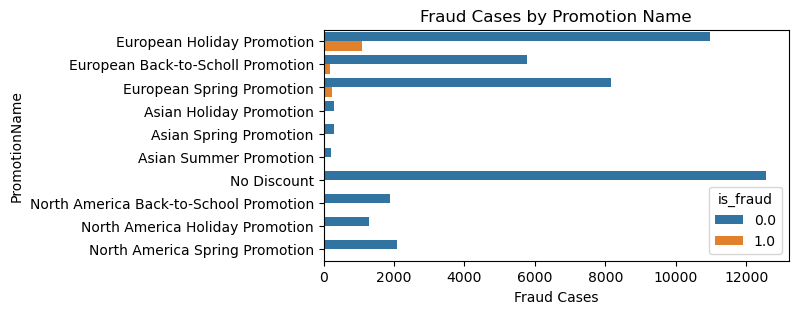

In [205]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, y='PromotionName',hue="is_fraud", order= orderpromN)
plt.xlabel('Fraud Cases')
plt.title('Fraud Cases by Promotion Name')
plt.show()

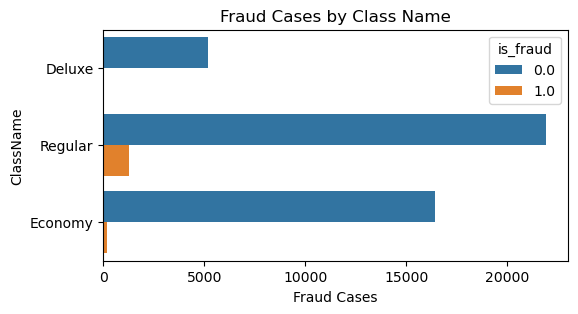

In [204]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, y='ClassName',hue="is_fraud")
plt.xlabel('Fraud Cases')
plt.title('Fraud Cases by Class Name')
plt.show()

In [192]:
ordercolorN= df.groupby("ColorName")["is_fraud"].mean().sort_values(ascending=False).index

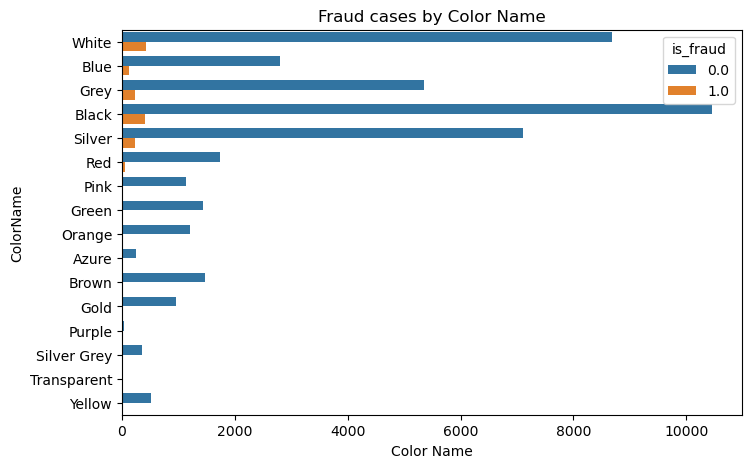

In [193]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='ColorName',hue="is_fraud", order= ordercolorN)
plt.xlabel('Color Name')
plt.title('Fraud cases by Color Name')
plt.show()

In [194]:
ordermfg= df.groupby("Manufacturer")["is_fraud"].mean().sort_values(ascending=False).index

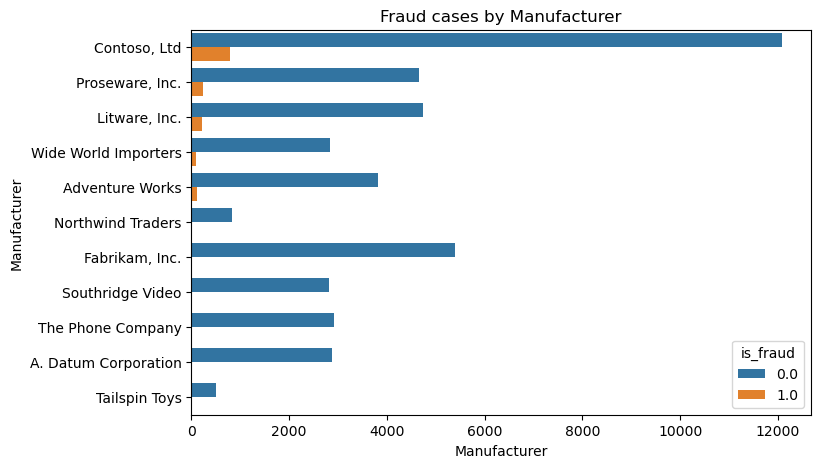

In [196]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='Manufacturer',hue="is_fraud", order= ordermfg)
plt.xlabel('Manufacturer')
plt.title('Fraud cases by Manufacturer')
plt.show()

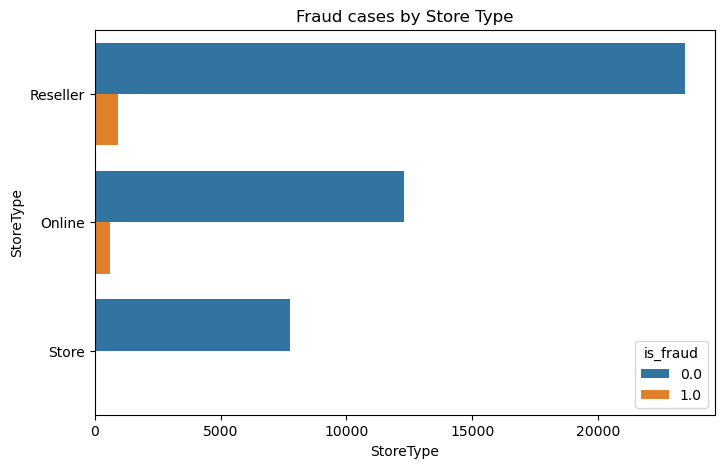

In [197]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='StoreType',hue="is_fraud")
plt.xlabel('StoreType')
plt.title('Fraud cases by Store Type')
plt.show()

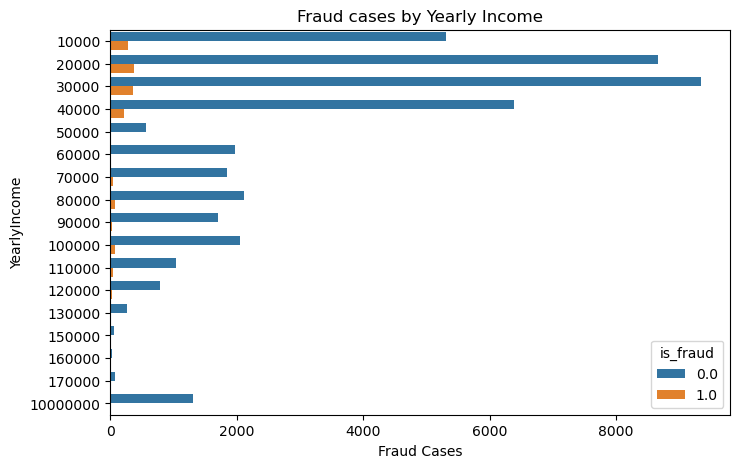

In [202]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='YearlyIncome',hue="is_fraud")
plt.xlabel('Fraud Cases')
plt.title('Fraud cases by Yearly Income')
plt.show()